# 라이브러리

In [1]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.metrics import mean_squared_log_error
from tqdm import tqdm

In [2]:
import os
print(os.getcwd())
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
from matplotlib import font_manager, rc
font_path="C:/Users/yehoo/Untitled Folder 1/malgun.ttf"
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc("font", family=font_name)
import seaborn as sns
from datetime import datetime
from tqdm import tqdm
from fbprophet import Prophet 
path='C:/Users/yehoo/Untitled Folder 1/'
from pycaret.regression import *

C:\Users\yehoo\Untitled Folder 1


In [ ]:
# print("pandas version: ", pd.__version__)
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

# 전처리

In [3]:
buy_weather_weight=pd.read_csv('./buy_df_제거_가중치_0채움_날씨.csv', encoding='cp949')

In [4]:
buy_weather_sum=pd.read_csv('./buy_df_제거_단순합_0채움_날씨.csv', encoding='cp949')

In [5]:
buy_weather_weight['date'] = pd.to_datetime(buy_weather_weight['date'], format='%Y-%m-%d')
buy_weather_weight['year']=buy_weather_weight['date'].dt.year

In [6]:
buy_weather_sum['date'] = pd.to_datetime(buy_weather_sum['date'], format='%Y-%m-%d')
buy_weather_sum['year']=buy_weather_sum['date'].dt.year

In [7]:
encoder = LabelEncoder()
buy_weather_weight.iloc[:,17] = encoder.fit_transform(buy_weather_weight.iloc[:,17])
buy_weather_weight.iloc[:,20] = encoder.fit_transform(buy_weather_weight.iloc[:,20])
buy_weather_weight.iloc[:,21] = encoder.fit_transform(buy_weather_weight.iloc[:,21])

In [10]:
beauti_1=buy_weather_weight[(buy_weather_weight['big_cat']=='뷰티')&(buy_weather_weight['cluster']==1)]
beauti_2=buy_weather_weight[(buy_weather_weight['big_cat']=='뷰티')&(buy_weather_weight['cluster']==2)]
beauti_3=buy_weather_weight[(buy_weather_weight['big_cat']=='뷰티')&(buy_weather_weight['cluster']==3)]
food_1=buy_weather_weight[(buy_weather_weight['big_cat']=='식품')&(buy_weather_weight['cluster']==1)]
food_2=buy_weather_weight[(buy_weather_weight['big_cat']=='식품')&(buy_weather_weight['cluster']==2)]
food_3=buy_weather_weight[(buy_weather_weight['big_cat']=='식품')&(buy_weather_weight['cluster']==3)]
electronic_1=buy_weather_weight[(buy_weather_weight['big_cat']=='냉난방가전')&(buy_weather_weight['cluster']==1)]
electronic_2=buy_weather_weight[(buy_weather_weight['big_cat']=='냉난방가전')&(buy_weather_weight['cluster']==2)]

In [11]:
beauti_1.drop(['big_cat','cluster'],axis=1, inplace=True)
beauti_2.drop(['big_cat','cluster'],axis=1, inplace=True)
beauti_3.drop(['big_cat','cluster'],axis=1, inplace=True)
food_1.drop(['big_cat','cluster'],axis=1, inplace=True)
food_2.drop(['big_cat','cluster'],axis=1, inplace=True)
food_3.drop(['big_cat','cluster'],axis=1, inplace=True)
electronic_1.drop(['big_cat','cluster'],axis=1, inplace=True)
electronic_2.drop(['big_cat','cluster'],axis=1, inplace=True)

# 모델링

In [12]:
# 평가 함수
# def MAPE(y_test, y_pred):
#     return np.mean(np.abs((y_test - y_pred) / y_test)) 
    
# def RMSLE(y_test, y_pred):
#     return np.sqrt(mean_squared_log_error(y_test, y_pred))

def RMSLE(y_test, y_pred):
    return np.sqrt(np.mean(np.square(np.log1p(y_test) - np.log1p(y_pred))))

In [13]:
# 군집별 데이터프레임 리스트
cluster_df_list=[beauti_1,beauti_2,beauti_3,food_1,food_2,food_3,
                electronic_1,electronic_2]

In [14]:
# 군집별 결과 저장 데이터프레임
beauti_1_result=pd.DataFrame()
beauti_2_result=pd.DataFrame()
beauti_3_result=pd.DataFrame()
food_1_result=pd.DataFrame()
food_2_result=pd.DataFrame()
food_3_result=pd.DataFrame()
electronic_1_result=pd.DataFrame()
electronic_2_result=pd.DataFrame()

## fbprophet

In [15]:
# 휴일 목록
holidays = pd.DataFrame({
'holiday': 'playoff',
'ds': pd.to_datetime(['2018-01-01','2018-02-15','2018-02-16','2018-02-17','2018-03-01','2018-05-05','2018-05-07','2018-05-22','2018-06-06','2018-06-13','2018-08-15','2018-09-23','2018-09-24','2018-09-25','2018-09-26','2018-10-03','2018-10-09','2018-12-25','2019-01-01','2019-02-04','2019-02-05','2019-02-06','2019-03-01','2019-05-05','2019-05-06','2019-05-12','2019-06-06','2019-08-15','2019-09-12','2019-09-13','2019-09-14','2019-10-03','2019-10-09','2019-12-25']),
'lower_window': 0,
'upper_window': 1,})

In [16]:
beauti_1_list=list(beauti_1.sm_cat.unique())
beauti_2_list=list(beauti_2.sm_cat.unique())
beauti_3_list=list(beauti_3.sm_cat.unique())
food_1_list=list(food_1.sm_cat.unique())
food_2_list=list(food_2.sm_cat.unique())
food_3_list=list(food_3.sm_cat.unique())
electronic_1_list=list(electronic_1.sm_cat.unique())
electronic_2_list=list(electronic_2.sm_cat.unique())

In [17]:
beauti_1_result['sm_cat']=beauti_1_list
beauti_2_result['sm_cat']=beauti_2_list
beauti_3_result['sm_cat']=beauti_3_list
food_1_result['sm_cat']=food_1_list
food_2_result['sm_cat']=food_2_list
food_3_result['sm_cat']=food_3_list
electronic_1_result['sm_cat']=electronic_1_list
electronic_2_result['sm_cat']=electronic_2_list

In [18]:
beauti_1_result['fbprophet']=beauti_1_list
beauti_2_result['fbprophet']=beauti_2_list
beauti_3_result['fbprophet']=beauti_3_list
food_1_result['fbprophet']=food_1_list
food_2_result['fbprophet']=food_2_list
food_3_result['fbprophet']=food_3_list
electronic_1_result['fbprophet']=electronic_1_list
electronic_2_result['fbprophet']=electronic_2_list

In [19]:
for i in tqdm(range(len(beauti_1_list))):
    temp=beauti_1[beauti_1.sm_cat==beauti_1_list[i]].iloc[:,[0,2]]
    temp.rename(columns={'date':'ds', 'adj_qty':'y'}, inplace=True)
    y_train_fb=temp[:546]
    globals()['y_test_beauti_1_fb_{}'.format(i)] = temp[546:]
    m = Prophet(weekly_seasonality=True,
    yearly_seasonality=True,
           holidays=holidays)
    m.fit(y_train_fb)
    future_m = m.make_future_dataframe(periods=184)
    forecast_m = m.predict(future_m)
    globals()['y_pred_beauti_1_fb_{}'.format(i)]=forecast_m.iloc[546:,[0,-1]]
    beauti_1_result.iloc[i,1]=RMSLE(globals()['y_test_beauti_1_fb_{}'.format(i)].set_index(['ds']).iloc[:,0],
                                     globals()['y_pred_beauti_1_fb_{}'.format(i)].set_index(['ds']).iloc[:,0])

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [01:35<00:00,  2.97s/it]


In [20]:
for i in tqdm(range(len(beauti_2_list))):
    temp=beauti_2[beauti_2.sm_cat==beauti_2_list[i]].iloc[:,[0,2]]
    temp.rename(columns={'date':'ds', 'adj_qty':'y'}, inplace=True)
    y_train_fb=temp[:546]
    globals()['y_test_beauti_2_fb_{}'.format(i)] = temp[546:]
    m = Prophet(weekly_seasonality=True,
    yearly_seasonality=True,
           holidays=holidays)
    m.fit(y_train_fb)
    future_m = m.make_future_dataframe(periods=184)
    forecast_m = m.predict(future_m)
    globals()['y_pred_beauti_2_fb_{}'.format(i)]=forecast_m.iloc[546:,[0,-1]]
    beauti_2_result.iloc[i,1]=RMSLE(globals()['y_test_beauti_2_fb_{}'.format(i)].set_index(['ds']).iloc[:,0],
                                     globals()['y_pred_beauti_2_fb_{}'.format(i)].set_index(['ds']).iloc[:,0])

100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [01:16<00:00,  2.83s/it]


In [21]:
for i in tqdm(range(len(food_1_list))):
    temp=food_1[food_1.sm_cat==food_1_list[i]].iloc[:,[0,2]]
    temp.rename(columns={'date':'ds', 'adj_qty':'y'}, inplace=True)
    y_train_fb=temp[:546]
    globals()['y_test_food_1_fb_{}'.format(i)] = temp[546:]
    m = Prophet(weekly_seasonality=True,
    yearly_seasonality=True,
           holidays=holidays)
    m.fit(y_train_fb)
    future_m = m.make_future_dataframe(periods=184)
    forecast_m = m.predict(future_m)
    globals()['y_pred_food_1_fb_{}'.format(i)]=forecast_m.iloc[546:,[0,-1]]
    food_1_result.iloc[i,1]=RMSLE(globals()['y_test_food_1_fb_{}'.format(i)].set_index(['ds']).iloc[:,0],
                                     globals()['y_pred_food_1_fb_{}'.format(i)].set_index(['ds']).iloc[:,0])

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [01:30<00:00,  3.01s/it]


In [22]:
for i in tqdm(range(len(electronic_1_list))):
    temp=electronic_1[electronic_1.sm_cat==electronic_1_list[i]].iloc[:,[0,2]]
    temp.rename(columns={'date':'ds', 'adj_qty':'y'}, inplace=True)
    y_train_fb=temp[:546]
    globals()['y_test_electronic_1_fb_{}'.format(i)] = temp[546:]
    m = Prophet(weekly_seasonality=True,
    yearly_seasonality=True,
           holidays=holidays)
    m.fit(y_train_fb)
    future_m = m.make_future_dataframe(periods=184)
    forecast_m = m.predict(future_m)
    globals()['y_pred_electronic_1_fb_{}'.format(i)]=forecast_m.iloc[546:,[0,-1]]
    electronic_1_result.iloc[i,1]=RMSLE(globals()['y_test_electronic_1_fb_{}'.format(i)].set_index(['ds']).iloc[:,0],
                                     globals()['y_pred_electronic_1_fb_{}'.format(i)].set_index(['ds']).iloc[:,0])

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:37<00:00,  3.09s/it]


In [23]:
for i in tqdm(range(len(electronic_2_list))):
    temp=electronic_2[electronic_2.sm_cat==electronic_2_list[i]].iloc[:,[0,2]]
    temp.rename(columns={'date':'ds', 'adj_qty':'y'}, inplace=True)
    y_train_fb=temp[:546]
    globals()['y_test_electronic_2_fb_{}'.format(i)] = temp[546:]
    m = Prophet(weekly_seasonality=True,
    yearly_seasonality=True,
           holidays=holidays)
    m.fit(y_train_fb)
    future_m = m.make_future_dataframe(periods=184)
    forecast_m = m.predict(future_m)
    globals()['y_pred_electronic_2_fb_{}'.format(i)]=forecast_m.iloc[546:,[0,-1]]
    electronic_2_result.iloc[i,1]=RMSLE(globals()['y_test_electronic_2_fb_{}'.format(i)].set_index(['ds']).iloc[:,0],
                                     globals()['y_pred_electronic_2_fb_{}'.format(i)].set_index(['ds']).iloc[:,0])

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:51<00:00,  2.86s/it]


## GBR

In [24]:
beauti_1_result['gbr']=beauti_1_list
beauti_2_result['gbr']=beauti_2_list
beauti_3_result['gbr']=beauti_3_list
food_1_result['gbr']=food_1_list
food_2_result['gbr']=food_2_list
food_3_result['gbr']=food_3_list
electronic_1_result['gbr']=electronic_1_list
electronic_2_result['gbr']=electronic_2_list

In [25]:
for i in tqdm(range(len(beauti_1_list))):
    ml_train_beauti_1=beauti_1[beauti_1.sm_cat==beauti_1_list[i]].iloc[:546,]
    ml_test_beauti_1=beauti_1[beauti_1.sm_cat==beauti_1_list[i]].iloc[546:,]
    globals()['reg_beauti_1_{}'.format(i)]=setup(data=ml_train_beauti_1, categorical_features=['week','holiday','month','year','season','angry_level'] ,ignore_features=['date','sm_cat'],target='adj_qty', train_size=0.9, 
                                                 silent=True, session_id=123, verbose=False)
    globals()['model_beauti_1_{}'.format(i)]=create_model('gbr', fold=5)
    predictions = predict_model(globals()['model_beauti_1_{}'.format(i)], data = ml_test_beauti_1)
    globals()['y_pred_beauti_1_ml_{}'.format(i)]=predictions.loc[:,['date','Label']]
    globals()['y_test_beauti_1_ml_{}'.format(i)]=predictions.loc[:,['date','adj_qty']]
    beauti_1_result.iloc[i,2]=RMSLE(predictions.loc[:,'adj_qty'],predictions.loc[:,'Label'])


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6783,0.6788,0.8239,0.2004,0.3104,0.5812
1,0.5271,0.4778,0.6912,0.0683,0.2585,0.4757
2,0.6801,1.0100,1.0050,-0.0136,0.3104,0.4468
3,0.6307,0.7018,0.8377,0.0916,0.3175,0.8234
4,0.6341,0.6814,0.8255,0.0619,0.2919,0.4835
Mean,0.6300,0.7100,0.8367,0.0817,0.2977,0.5621
SD,0.0556,0.1708,0.0998,0.0690,0.0214,0.1383


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................
INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='f

In [26]:
for i in tqdm(range(len(beauti_2_list))):
    ml_train_beauti_2=beauti_2[beauti_2.sm_cat==beauti_2_list[i]].iloc[:546,]
    ml_test_beauti_2=beauti_2[beauti_2.sm_cat==beauti_2_list[i]].iloc[546:,]
    globals()['reg_beauti_2_{}'.format(i)]=setup(data=ml_train_beauti_2, categorical_features=['week','holiday','month','year','season','angry_level'] ,ignore_features=['date','sm_cat'],target='adj_qty', train_size=0.9, 
                                                 silent=True, session_id=123, verbose=False)
    globals()['model_beauti_2_{}'.format(i)]=create_model('gbr', fold=5)
    predictions = predict_model(globals()['model_beauti_2_{}'.format(i)], data = ml_test_beauti_2)
    globals()['y_pred_beauti_2_ml_{}'.format(i)]=predictions.loc[:,['date','Label']]
    globals()['y_test_beauti_2_ml_{}'.format(i)]=predictions.loc[:,['date','adj_qty']]
    beauti_2_result.iloc[i,2]=RMSLE(predictions.loc[:,'adj_qty'],predictions.loc[:,'Label'])


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.2476,187.2906,13.6854,-0.2503,0.3027,0.2537
1,6.5863,190.7108,13.8098,0.3565,0.2192,0.1485
2,6.1123,109.7220,10.4748,0.2925,0.2069,0.1630
3,5.9462,64.8614,8.0537,0.6112,0.2126,0.1779
4,8.2030,377.9459,19.4408,0.1628,0.2583,0.1610
Mean,7.0191,186.1061,13.0929,0.2345,0.2399,0.1808
SD,1.0071,107.1074,3.8317,0.2829,0.0362,0.0376


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................
INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='f

In [27]:
for i in tqdm(range(len(food_1_list))):
    ml_train_food_1=food_1[food_1.sm_cat==food_1_list[i]].iloc[:546,]
    ml_test_food_1=food_1[food_1.sm_cat==food_1_list[i]].iloc[546:,]
    globals()['reg_food_1_{}'.format(i)]=setup(data=ml_train_food_1, categorical_features=['week','holiday','month','year','season','angry_level'] ,ignore_features=['date','sm_cat'],target='adj_qty', train_size=0.9, 
                                                 silent=True, session_id=123, verbose=False)
    globals()['model_food_1_{}'.format(i)]=create_model('gbr', fold=5)
    predictions = predict_model(globals()['model_food_1_{}'.format(i)], data = ml_test_food_1)
    globals()['y_pred_food_1_ml_{}'.format(i)]=predictions.loc[:,['date','Label']]
    globals()['y_test_food_1_ml_{}'.format(i)]=predictions.loc[:,['date','adj_qty']]
    food_1_result.iloc[i,2]=RMSLE(predictions.loc[:,'adj_qty'],predictions.loc[:,'Label'])


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,29.6552,1419.2608,37.6731,0.3632,0.1880,0.1493
1,29.3846,1436.6837,37.9036,0.4552,0.1967,0.1589
2,30.7294,2105.1551,45.8820,0.2922,0.2114,0.1599
3,32.1172,2169.6234,46.5792,0.3265,0.2177,0.1656
4,29.3181,2373.0986,48.7145,0.4133,0.1913,0.1313
Mean,30.2409,1900.7643,43.3505,0.3701,0.2010,0.1530
SD,1.0665,396.0750,4.6370,0.0585,0.0116,0.0120


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................
INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='f

In [293]:
for i in tqdm(range(len(electronic_1_list))):
    ml_train_electronic_1=electronic_1[electronic_1.sm_cat==electronic_1_list[i]].iloc[:546,]
    ml_test_electronic_1=electronic_1[electronic_1.sm_cat==electronic_1_list[i]].iloc[546:,]
    globals()['reg_electronic_1_{}'.format(i)]=setup(data=ml_train_electronic_1, categorical_features=['week','holiday','month','year','season','angry_level'] ,ignore_features=['date','sm_cat'],target='adj_qty', train_size=0.9, 
                                                 silent=True, session_id=123, verbose=False)
    globals()['model_electronic_1_{}'.format(i)]=create_model('gbr', fold=5)
    predictions = predict_model(globals()['model_electronic_1_{}'.format(i)], data = ml_test_electronic_1)
    globals()['y_pred_electronic_1_ml_{}'.format(i)]=predictions.loc[:,['date','Label']]
    globals()['y_test_electronic_1_ml_{}'.format(i)]=predictions.loc[:,['date','adj_qty']]
    electronic_1_result.iloc[i,2]=RMSLE(predictions.loc[:,'adj_qty'],predictions.loc[:,'Label'])


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.6915,8.5343,2.9214,0.6261,0.4824,2.0956
1,1.7307,13.7132,3.7031,0.2589,0.4737,1.0734
2,1.8722,13.2883,3.6453,0.5603,0.4564,1.0750
3,1.4907,11.2964,3.3610,0.5745,0.4950,1.1420
4,1.3206,5.8749,2.4238,0.7272,0.3992,0.9316
Mean,1.6212,10.5414,3.2109,0.5494,0.4613,1.2635
SD,0.1936,2.9658,0.4810,0.1566,0.0335,0.4217


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................
INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='f

In [294]:
for i in tqdm(range(len(electronic_2_list))):
    ml_train_electronic_2=electronic_2[electronic_2.sm_cat==electronic_2_list[i]].iloc[:546,]
    ml_test_electronic_2=electronic_2[electronic_2.sm_cat==electronic_2_list[i]].iloc[546:,]
    globals()['reg_electronic_2_{}'.format(i)]=setup(data=ml_train_electronic_2, categorical_features=['week','holiday','month','year','season','angry_level'] ,ignore_features=['date','sm_cat'],target='adj_qty', train_size=0.9, 
                                                 silent=True, session_id=123, verbose=False)
    globals()['model_electronic_2_{}'.format(i)]=create_model('gbr', fold=5)
    predictions = predict_model(globals()['model_electronic_2_{}'.format(i)], data = ml_test_electronic_2)
    globals()['y_pred_electronic_2_ml_{}'.format(i)]=predictions.loc[:,['date','Label']]
    globals()['y_test_electronic_2_ml_{}'.format(i)]=predictions.loc[:,['date','adj_qty']]
    electronic_2_result.iloc[i,2]=RMSLE(predictions.loc[:,'adj_qty'],predictions.loc[:,'Label'])


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.9824,30.2688,5.5017,0.8419,0.3787,0.5305
1,7.0941,314.2902,17.7282,0.5567,0.5393,0.6655
2,3.9669,62.2540,7.8901,0.8413,0.5082,0.6606
3,5.1464,127.9039,11.3095,0.7331,0.4186,0.5963
4,5.7389,110.5915,10.5163,0.7767,0.4334,0.5701
Mean,4.9857,129.0617,10.5892,0.7499,0.4556,0.6046
SD,1.4205,98.8690,4.1148,0.1050,0.0592,0.0521


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................
INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='f

## ensemble

In [28]:
beauti_1_result['ensemble']=beauti_1_list
beauti_2_result['ensemble']=beauti_2_list
beauti_3_result['ensemble']=beauti_3_list
food_1_result['ensemble']=food_1_list
food_2_result['ensemble']=food_2_list
food_3_result['ensemble']=food_3_list
electronic_1_result['ensemble']=electronic_1_list
electronic_2_result['ensemble']=electronic_2_list

In [29]:
def ensemble(ts, ml, test):
    a=RMSLE(test.reset_index().adj_qty, ts)
    b=RMSLE(test.reset_index().adj_qty, ml)
    e=ts*(1/a)/(1/a+1/b)+ml*(1/b)/(1/a+1/b)
    return e

In [30]:
for i in tqdm(range(len(beauti_1_list))):  
    ensemble_df=pd.DataFrame(columns=['date', 'yhat'])
    ensemble_df.date=y_pred_beauti_1_ml_0.date
    ensemble_df=ensemble_df.reset_index()
    ensemble_df.drop(['index'], axis=1, inplace=True)
    ensemble_df.yhat=ensemble(globals()['y_pred_beauti_1_fb_{}'.format(i)].reset_index().yhat,   globals()['y_pred_beauti_1_ml_{}'.format(i)].reset_index().Label, 
                             globals()['y_test_beauti_1_ml_{}'.format(i)])
    globals()['y_pred_beauti_1_ensemble_{}'.format(i)]=ensemble_df
    beauti_1_result.loc[i,'ensemble']=RMSLE(globals()['y_test_beauti_1_ml_{}'.format(i)].reset_index().adj_qty,
                                            globals()['y_pred_beauti_1_ensemble_{}'.format(i)].yhat)


100%|█████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 143.21it/s]


In [31]:
for i in tqdm(range(len(beauti_2_list))):  
    ensemble_df=pd.DataFrame(columns=['date', 'yhat'])
    ensemble_df.date=y_pred_beauti_2_ml_0.date
    ensemble_df=ensemble_df.reset_index()
    ensemble_df.drop(['index'], axis=1, inplace=True)
    ensemble_df.yhat=ensemble(globals()['y_pred_beauti_2_fb_{}'.format(i)].reset_index().yhat,   globals()['y_pred_beauti_2_ml_{}'.format(i)].reset_index().Label, 
                             globals()['y_test_beauti_2_ml_{}'.format(i)])
    globals()['y_pred_beauti_2_ensemble_{}'.format(i)]=ensemble_df
    beauti_2_result.loc[i,'ensemble']=RMSLE(globals()['y_test_beauti_2_ml_{}'.format(i)].reset_index().adj_qty,
                                            globals()['y_pred_beauti_2_ensemble_{}'.format(i)].yhat)


100%|█████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 124.42it/s]


In [32]:
for i in tqdm(range(len(food_1_list))):  
    ensemble_df=pd.DataFrame(columns=['date', 'yhat'])
    ensemble_df.date=y_pred_food_1_ml_0.date
    ensemble_df=ensemble_df.reset_index()
    ensemble_df.drop(['index'], axis=1, inplace=True)
    ensemble_df.yhat=ensemble(globals()['y_pred_food_1_fb_{}'.format(i)].reset_index().yhat,   globals()['y_pred_food_1_ml_{}'.format(i)].reset_index().Label,
                             globals()['y_test_food_1_ml_{}'.format(i)])
    globals()['y_pred_food_1_ensemble_{}'.format(i)]=ensemble_df
    food_1_result.loc[i,'ensemble']=RMSLE(globals()['y_test_food_1_ml_{}'.format(i)].reset_index().adj_qty,
                                            globals()['y_pred_food_1_ensemble_{}'.format(i)].yhat)


100%|█████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 118.89it/s]


In [295]:
for i in tqdm(range(len(electronic_1_list))):  
    ensemble_df=pd.DataFrame(columns=['date', 'yhat'])
    ensemble_df.date=y_pred_electronic_1_ml_0.date
    ensemble_df=ensemble_df.reset_index()
    ensemble_df.drop(['index'], axis=1, inplace=True)
    ensemble_df.yhat=ensemble(globals()['y_pred_electronic_1_fb_{}'.format(i)].reset_index().yhat,   globals()['y_pred_electronic_1_ml_{}'.format(i)].reset_index().Label,
                             globals()['y_test_electronic_1_ml_{}'.format(i)])
    globals()['y_pred_electronic_1_ensemble_{}'.format(i)]=ensemble_df
    electronic_1_result.loc[i,'ensemble']=RMSLE(globals()['y_test_electronic_1_ml_{}'.format(i)].reset_index().adj_qty,
                                            globals()['y_pred_electronic_1_ensemble_{}'.format(i)].yhat)


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 43.28it/s]


In [296]:
for i in tqdm(range(len(electronic_2_list))):  
    ensemble_df=pd.DataFrame(columns=['date', 'yhat'])
    ensemble_df.date=y_pred_electronic_2_ml_0.date
    ensemble_df=ensemble_df.reset_index()
    ensemble_df.drop(['index'], axis=1, inplace=True)
    ensemble_df.yhat=ensemble(globals()['y_pred_electronic_2_fb_{}'.format(i)].reset_index().yhat,   globals()['y_pred_electronic_2_ml_{}'.format(i)].reset_index().Label,
                             globals()['y_test_electronic_2_ml_{}'.format(i)])
    globals()['y_pred_electronic_2_ensemble_{}'.format(i)]=ensemble_df
    electronic_2_result.loc[i,'ensemble']=RMSLE(globals()['y_test_electronic_2_ml_{}'.format(i)].reset_index().adj_qty,
                                            globals()['y_pred_electronic_2_ensemble_{}'.format(i)].yhat)


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 62.27it/s]


## XGB/RF/Ridge

In [33]:
beauti_1_result['xgb']=beauti_1_list
beauti_2_result['xgb']=beauti_2_list
beauti_3_result['xgb']=beauti_3_list
food_1_result['xgb']=food_1_list
food_2_result['xgb']=food_2_list
food_3_result['xgb']=food_3_list
electronic_1_result['xgb']=electronic_1_list
electronic_2_result['xgb']=electronic_2_list

In [34]:
beauti_1_result['rf']=beauti_1_list
beauti_2_result['rf']=beauti_2_list
beauti_3_result['rf']=beauti_3_list
food_1_result['rf']=food_1_list
food_2_result['rf']=food_2_list
food_3_result['rf']=food_3_list
electronic_1_result['rf']=electronic_1_list
electronic_2_result['rf']=electronic_2_list

In [35]:
beauti_1_result['ridge']=beauti_1_list
beauti_2_result['ridge']=beauti_2_list
beauti_3_result['ridge']=beauti_3_list
food_1_result['ridge']=food_1_list
food_2_result['ridge']=food_2_list
food_3_result['ridge']=food_3_list
electronic_1_result['ridge']=electronic_1_list
electronic_2_result['ridge']=electronic_2_list

In [36]:
for i in tqdm(range(len(beauti_3_list))):
    ml_train_beauti_3=beauti_3[beauti_3.sm_cat==beauti_3_list[i]].iloc[:546,]
    ml_test_beauti_3=beauti_3[beauti_3.sm_cat==beauti_3_list[i]].iloc[546:,]
    globals()['reg_beauti_3_{}'.format(i)]=setup(data=ml_train_beauti_3, categorical_features=['week','holiday','month','year','season','angry_level'] ,ignore_features=['date','sm_cat'],target='adj_qty', train_size=0.9, 
                                                 silent=True, session_id=123, verbose=False)
    globals()['xgboost_beauti_3_{}'.format(i)]=create_model('xgboost', fold=5)
    globals()['rf_beauti_3_{}'.format(i)]=create_model('rf', fold=5)
    globals()['ridge_beauti_3_{}'.format(i)]=create_model('ridge', fold=5)
    predictions_xgb = predict_model(globals()['xgboost_beauti_3_{}'.format(i)], data = ml_test_beauti_3)
    predictions_rf = predict_model(globals()['rf_beauti_3_{}'.format(i)], data = ml_test_beauti_3)
    predictions_ridge = predict_model(globals()['ridge_beauti_3_{}'.format(i)], data = ml_test_beauti_3)   
    globals()['y_test_beauti_3_ml_{}'.format(i)]=predictions_xgb.loc[:,['date','adj_qty']]
    
    globals()['y_pred_xgb_beauti_3_{}'.format(i)]=predictions_xgb.loc[:,['date','Label']]
    globals()['y_pred_rf_beauti_3_{}'.format(i)]=predictions_rf.loc[:,['date','Label']]
    globals()['y_pred_ridge_beauti_3_{}'.format(i)]=predictions_ridge.loc[:,['date','Label']]
      
    beauti_3_result.loc[i,'xgb']=RMSLE(predictions_xgb.loc[:,'adj_qty'],predictions_xgb.loc[:,'Label'])
    beauti_3_result.loc[i,'rf']=RMSLE(predictions_rf.loc[:,'adj_qty'],predictions_rf.loc[:,'Label'])
    beauti_3_result.loc[i,'ridge']=RMSLE(predictions_ridge.loc[:,'adj_qty'],predictions_ridge.loc[:,'Label'])


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.1312,2.9236,1.7099,0.3617,0.4765,3.1048
1,1.1126,2.7143,1.6475,0.4450,0.4595,1.5370
2,1.1569,3.7159,1.9277,0.1715,0.4725,2.1006
3,0.9565,2.3088,1.5195,0.4682,0.4426,2.7065
4,1.1662,13.2854,3.6449,0.1307,0.4858,1.0981
Mean,1.1047,4.9896,2.0899,0.3154,0.4674,2.1094
SD,0.0765,4.1731,0.7887,0.1394,0.0150,0.7345


INFO:logs:create_model_container: 3
INFO:logs:master_model_container: 3
INFO:logs:display_container: 4
INFO:logs:Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=123, solver='auto', tol=0.001)
INFO:logs:create_model() succesfully completed......................................
INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='auto',
             validate_paramete

In [37]:
for i in tqdm(range(len(food_2_list))):
    ml_train_food_2=food_2[food_2.sm_cat==food_2_list[i]].iloc[:546,]
    ml_test_food_2=food_2[food_2.sm_cat==food_2_list[i]].iloc[546:,]
    globals()['reg_food_2_{}'.format(i)]=setup(data=ml_train_food_2, categorical_features=['week','holiday','month','year','season','angry_level'] ,ignore_features=['date','sm_cat'],target='adj_qty', train_size=0.9, 
                                                 silent=True, session_id=123, verbose=False)
    globals()['xgboost_food_2_{}'.format(i)]=create_model('xgboost', fold=5)
    globals()['rf_food_2_{}'.format(i)]=create_model('rf', fold=5)
    globals()['ridge_food_2_{}'.format(i)]=create_model('ridge', fold=5)
    predictions_xgb = predict_model(globals()['xgboost_food_2_{}'.format(i)], data = ml_test_food_2)
    predictions_rf = predict_model(globals()['rf_food_2_{}'.format(i)], data = ml_test_food_2)
    predictions_ridge = predict_model(globals()['ridge_food_2_{}'.format(i)], data = ml_test_food_2)   
    globals()['y_test_food_2_ml_{}'.format(i)]=predictions_xgb.loc[:,['date','adj_qty']]
    
    globals()['y_pred_xgb_food_2_{}'.format(i)]=predictions_xgb.loc[:,['date','Label']]
    globals()['y_pred_rf_food_2_{}'.format(i)]=predictions_rf.loc[:,['date','Label']]
    globals()['y_pred_ridge_food_2_{}'.format(i)]=predictions_ridge.loc[:,['date','Label']]
      
    food_2_result.loc[i,'xgb']=RMSLE(predictions_xgb.loc[:,'adj_qty'],predictions_xgb.loc[:,'Label'])
    food_2_result.loc[i,'rf']=RMSLE(predictions_rf.loc[:,'adj_qty'],predictions_rf.loc[:,'Label'])
    food_2_result.loc[i,'ridge']=RMSLE(predictions_ridge.loc[:,'adj_qty'],predictions_ridge.loc[:,'Label'])


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,19.2701,728.5959,26.9925,0.5844,0.2487,0.1755
1,16.5828,438.1756,20.9326,0.5857,0.1760,0.1388
2,16.8041,584.1371,24.1689,0.6049,0.2078,0.1416
3,18.9843,735.0286,27.1114,0.5658,0.2992,0.2243
4,17.0351,477.2900,21.8470,0.6529,0.1828,0.1352
Mean,17.7353,592.6455,24.2105,0.5987,0.2229,0.1631
SD,1.1490,123.2848,2.5490,0.0298,0.0459,0.0339


INFO:logs:create_model_container: 3
INFO:logs:master_model_container: 3
INFO:logs:display_container: 4
INFO:logs:Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=123, solver='auto', tol=0.001)
INFO:logs:create_model() succesfully completed......................................
INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='auto',
             validate_paramete

In [38]:
for i in tqdm(range(len(food_3_list))):
    ml_train_food_3=food_3[food_3.sm_cat==food_3_list[i]].iloc[:546,]
    ml_test_food_3=food_3[food_3.sm_cat==food_3_list[i]].iloc[546:,]
    globals()['reg_food_3_{}'.format(i)]=setup(data=ml_train_food_3, categorical_features=['week','holiday','month','year','season','angry_level'] ,ignore_features=['date','sm_cat'],target='adj_qty', train_size=0.9, 
                                                 silent=True, session_id=123, verbose=False)
    globals()['xgboost_food_3_{}'.format(i)]=create_model('xgboost', fold=5)
    globals()['rf_food_3_{}'.format(i)]=create_model('rf', fold=5)
    globals()['ridge_food_3_{}'.format(i)]=create_model('ridge', fold=5)
    predictions_xgb = predict_model(globals()['xgboost_food_3_{}'.format(i)], data = ml_test_food_3)
    predictions_rf = predict_model(globals()['rf_food_3_{}'.format(i)], data = ml_test_food_3)
    predictions_ridge = predict_model(globals()['ridge_food_3_{}'.format(i)], data = ml_test_food_3)   
    globals()['y_test_food_3_ml_{}'.format(i)]=predictions_xgb.loc[:,['date','adj_qty']]
    
    globals()['y_pred_xgb_food_3_{}'.format(i)]=predictions_xgb.loc[:,['date','Label']]
    globals()['y_pred_rf_food_3_{}'.format(i)]=predictions_rf.loc[:,['date','Label']]
    globals()['y_pred_ridge_food_3_{}'.format(i)]=predictions_ridge.loc[:,['date','Label']]
      
    food_3_result.loc[i,'xgb']=RMSLE(predictions_xgb.loc[:,'adj_qty'],predictions_xgb.loc[:,'Label'])
    food_3_result.loc[i,'rf']=RMSLE(predictions_rf.loc[:,'adj_qty'],predictions_rf.loc[:,'Label'])
    food_3_result.loc[i,'ridge']=RMSLE(predictions_ridge.loc[:,'adj_qty'],predictions_ridge.loc[:,'Label'])


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.9466,6.3144,2.5129,0.6363,0.2753,0.2622
1,1.8218,5.8983,2.4286,0.6445,0.2578,0.2432
2,2.0671,13.9591,3.7362,0.4951,0.2753,0.2477
3,2.1567,14.8619,3.8551,0.4516,0.3158,0.3085
4,1.6166,4.4972,2.1207,0.5641,0.2274,0.2225
Mean,1.9217,9.1062,2.9307,0.5583,0.2703,0.2568
SD,0.1898,4.3819,0.7192,0.0760,0.0287,0.0288


INFO:logs:create_model_container: 3
INFO:logs:master_model_container: 3
INFO:logs:display_container: 4
INFO:logs:Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=123, solver='auto', tol=0.001)
INFO:logs:create_model() succesfully completed......................................
INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='auto',
             validate_paramete

In [297]:
for i in tqdm(range(len(electronic_1_list))):
    ml_train_electronic_1=electronic_1[electronic_1.sm_cat==electronic_1_list[i]].iloc[:546,]
    ml_test_electronic_1=electronic_1[electronic_1.sm_cat==electronic_1_list[i]].iloc[546:,]
    globals()['reg_electronic_1_{}'.format(i)]=setup(data=ml_train_electronic_1, categorical_features=['week','holiday','month','year','season','angry_level'] ,ignore_features=['date','sm_cat'],target='adj_qty', train_size=0.9, 
                                                 silent=True, session_id=123, verbose=False)
    globals()['xgboost_electronic_1_{}'.format(i)]=create_model('xgboost', fold=5)
    globals()['rf_electronic_1_{}'.format(i)]=create_model('rf', fold=5)
    globals()['ridge_electronic_1_{}'.format(i)]=create_model('ridge', fold=5)
    predictions_xgb = predict_model(globals()['xgboost_electronic_1_{}'.format(i)], data = ml_test_electronic_1)
    predictions_rf = predict_model(globals()['rf_electronic_1_{}'.format(i)], data = ml_test_electronic_1)
    predictions_ridge = predict_model(globals()['ridge_electronic_1_{}'.format(i)], data = ml_test_electronic_1)   
    
    globals()['y_pred_xgb_electronic_1_{}'.format(i)]=predictions_xgb.loc[:,['date','Label']]
    globals()['y_pred_rf_electronic_1_{}'.format(i)]=predictions_rf.loc[:,['date','Label']]
    globals()['y_pred_ridge_electronic_1_{}'.format(i)]=predictions_ridge.loc[:,['date','Label']]
      
    electronic_1_result.loc[i,'xgb']=RMSLE(predictions_xgb.loc[:,'adj_qty'],predictions_xgb.loc[:,'Label'])
    electronic_1_result.loc[i,'rf']=RMSLE(predictions_rf.loc[:,'adj_qty'],predictions_rf.loc[:,'Label'])
    electronic_1_result.loc[i,'ridge']=RMSLE(predictions_ridge.loc[:,'adj_qty'],predictions_ridge.loc[:,'Label'])


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.9840,8.6845,2.9469,0.6195,0.6607,3.7911
1,2.0264,8.6305,2.9378,0.5336,0.5606,2.3939
2,2.1128,18.4263,4.2926,0.3902,0.5160,1.7724
3,1.7256,10.8635,3.2960,0.5908,0.5030,1.8315
4,1.6382,7.1376,2.6716,0.6685,0.5230,2.2932
Mean,1.8974,10.7485,3.2290,0.5605,0.5527,2.4164
SD,0.1829,4.0186,0.5676,0.0957,0.0573,0.7297


INFO:logs:create_model_container: 3
INFO:logs:master_model_container: 3
INFO:logs:display_container: 4
INFO:logs:Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=123, solver='auto', tol=0.001)
INFO:logs:create_model() succesfully completed......................................
INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='auto',
             validate_paramete

In [298]:
for i in tqdm(range(len(electronic_2_list))):
    ml_train_electronic_2=electronic_2[electronic_2.sm_cat==electronic_2_list[i]].iloc[:546,]
    ml_test_electronic_2=electronic_2[electronic_2.sm_cat==electronic_2_list[i]].iloc[546:,]
    globals()['reg_electronic_2_{}'.format(i)]=setup(data=ml_train_electronic_2, categorical_features=['week','holiday','month','year','season','angry_level'] ,ignore_features=['date','sm_cat'],target='adj_qty', train_size=0.9, 
                                                 silent=True, session_id=123, verbose=False)
    globals()['xgboost_electronic_2_{}'.format(i)]=create_model('xgboost', fold=5)
    globals()['rf_electronic_2_{}'.format(i)]=create_model('rf', fold=5)
    globals()['ridge_electronic_2_{}'.format(i)]=create_model('ridge', fold=5)
    predictions_xgb = predict_model(globals()['xgboost_electronic_2_{}'.format(i)], data = ml_test_electronic_2)
    predictions_rf = predict_model(globals()['rf_electronic_2_{}'.format(i)], data = ml_test_electronic_2)
    predictions_ridge = predict_model(globals()['ridge_electronic_2_{}'.format(i)], data = ml_test_electronic_2)   
    
    globals()['y_pred_xgb_electronic_2_{}'.format(i)]=predictions_xgb.loc[:,['date','Label']]
    globals()['y_pred_rf_electronic_2_{}'.format(i)]=predictions_rf.loc[:,['date','Label']]
    globals()['y_pred_ridge_electronic_2_{}'.format(i)]=predictions_ridge.loc[:,['date','Label']]
      
    electronic_2_result.loc[i,'xgb']=RMSLE(predictions_xgb.loc[:,'adj_qty'],predictions_xgb.loc[:,'Label'])
    electronic_2_result.loc[i,'rf']=RMSLE(predictions_rf.loc[:,'adj_qty'],predictions_rf.loc[:,'Label'])
    electronic_2_result.loc[i,'ridge']=RMSLE(predictions_ridge.loc[:,'adj_qty'],predictions_ridge.loc[:,'Label'])


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5.5869,63.7465,7.9841,0.6671,0.7505,2.1579
1,9.0857,319.6671,17.8792,0.5491,0.7624,2.1612
2,6.1485,88.4546,9.4050,0.7746,0.7529,1.8660
3,7.6646,152.1963,12.3368,0.6824,0.7434,2.3373
4,7.5450,109.5431,10.4663,0.7788,0.7532,1.9358
Mean,7.2061,146.7215,11.6143,0.6904,0.7525,2.0916
SD,1.2328,91.2165,3.4394,0.0842,0.0061,0.1702


INFO:logs:create_model_container: 3
INFO:logs:master_model_container: 3
INFO:logs:display_container: 4
INFO:logs:Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=123, solver='auto', tol=0.001)
INFO:logs:create_model() succesfully completed......................................
INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='auto',
             validate_paramete

In [453]:
# electronic_1_result.to_csv('./electronic_1_result.csv',encoding='cp949')
# electronic_2_result.to_csv('./electronic_2_result.csv',encoding='cp949')
# beauti_1_result.to_csv('./beauti_1_result.csv', encoding='cp949')
# beauti_2_result.to_csv('./beauti_2_result.csv', encoding='cp949')
# beauti_3_result.to_csv('./beauti_3_result.csv',encoding='cp949')
# food_1_result.to_csv('./food_1_result.csv',encoding='cp949')
# food_2_result.to_csv('./food_2_result.csv',encoding='cp949')
# food_3_result.to_csv('./food_3_result.csv',encoding='cp949')

## 트렌드 지수

In [39]:
beauti_list=beauti_1_list+beauti_2_list+beauti_3_list
food_list=food_1_list+food_2_list+food_3_list
electronic_list=electronic_1_list+electronic_2_list

In [40]:
sns_df=pd.read_csv('./sns_df_trend.csv', encoding='cp949')

In [307]:
sns_df['date'] = pd.to_datetime(sns_df['date'], format='%Y-%m-%d')

In [41]:
sns_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [109]:
food_1_list[28]='해초류'

In [340]:
sns_trend_beauti_1_list=[]
for i in tqdm(range(len(beauti_1_list))):
    sns_temp=sns_df[sns_df.sm_cat==beauti_1_list[i]][['date','cnt']]
    sns_temp=sns_temp.reset_index()
    sns_temp.drop(['index'],axis=1,inplace=True)
    sns_trend=pd.DataFrame(columns=['date','window1','window2','window3','trend'])
    sns_trend.date=sns_df[sns_df.sm_cat==beauti_1_list[0]][['date','cnt']].date
    sns_trend=sns_trend.reset_index()
    sns_trend.drop(['index'], axis=1, inplace=True)
    for j in sns_trend.index[:709]:
        sns_trend.loc[21+j,'window1']=sum((sns_temp.loc[j:j+21,'cnt']/max(sns_temp.loc[j:j+21,'cnt']))[0:0+7])
        sns_trend.loc[21+j,'window2']=sum((sns_temp.loc[j:j+21,'cnt']/max(sns_temp.loc[j:j+21,'cnt']))[0+7:0+7+7])
        sns_trend.loc[21+j,'window3']=sum((sns_temp.loc[j:j+21,'cnt']/max(sns_temp.loc[j:j+21,'cnt']))[0+7+7:0+7+7+7+7])
        sns_trend.loc[21+j,'trend']=(sns_trend.loc[21+j,'window1']*0.1+
                                sns_trend.loc[21+j,'window2']*0.3+
                               sns_trend.loc[21+j,'window3']*0.6)
        globals()['sns_trend_beauti_1_{}'.format(i)]=sns_trend.iloc[21:730]
        sns_trend_beauti_1_list.append(globals()['sns_trend_beauti_1_{}'.format(i)])


100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:45<00:00,  1.43s/it]


In [344]:
sns_trend_beauti_1_6

,date,window1,window2,window3,trend
21,2018-01-22,5.4961,5.88255,6.76014,6.37046
22,2018-01-23,5.88217,5.97308,6.68057,6.38848
23,2018-01-24,5.89206,5.99396,6.75905,6.44283
24,2018-01-25,5.7228,6.06834,6.80631,6.47656
25,2018-01-26,5.7632,5.99456,6.82898,6.47207
...,...,...,...,...,...
725,2019-12-27,6.09312,5.90131,6.24771,6.12833
726,2019-12-28,6.02156,6.04131,5.95289,5.98628
727,2019-12-29,5.91797,6.06252,5.97329,5.99453
728,2019-12-30,5.84473,6.06442,6.01451,6.01251


In [345]:
sns_trend_beauti_2_list=[]
for i in tqdm(range(len(beauti_2_list))):
    sns_temp=sns_df[sns_df.sm_cat==beauti_2_list[i]][['date','cnt']]
    sns_temp=sns_temp.reset_index()
    sns_temp.drop(['index'],axis=1,inplace=True)
    sns_trend=pd.DataFrame(columns=['date','window1','window2','window3','trend'])
    sns_trend.date=sns_df[sns_df.sm_cat==beauti_2_list[0]][['date','cnt']].date
    sns_trend=sns_trend.reset_index()
    sns_trend.drop(['index'], axis=1, inplace=True)
    for j in sns_trend.index[:709]:
        sns_trend.loc[21+j,'window1']=sum((sns_temp.loc[j:j+21,'cnt']/max(sns_temp.loc[j:j+21,'cnt']))[0:0+7])
        sns_trend.loc[21+j,'window2']=sum((sns_temp.loc[j:j+21,'cnt']/max(sns_temp.loc[j:j+21,'cnt']))[0+7:0+7+7])
        sns_trend.loc[21+j,'window3']=sum((sns_temp.loc[j:j+21,'cnt']/max(sns_temp.loc[j:j+21,'cnt']))[0+7+7:0+7+7+7+7])
        sns_trend.loc[21+j,'trend']=(sns_trend.loc[21+j,'window1']*0.1+
                                sns_trend.loc[21+j,'window2']*0.3+
                               sns_trend.loc[21+j,'window3']*0.6)
        globals()['sns_trend_beauti_2_{}'.format(i)]=sns_trend.iloc[21:730]
        sns_trend_beauti_2_list.append(globals()['sns_trend_beauti_2_{}'.format(i)])


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:38<00:00,  1.42s/it]


In [346]:
sns_trend_beauti_3_list=[]
for i in tqdm(range(len(beauti_3_list))):
    sns_temp=sns_df[sns_df.sm_cat==beauti_3_list[i]][['date','cnt']]
    sns_temp=sns_temp.reset_index()
    sns_temp.drop(['index'],axis=1,inplace=True)
    sns_trend=pd.DataFrame(columns=['date','window1','window2','window3','trend'])
    sns_trend.date=sns_df[sns_df.sm_cat==beauti_3_list[0]][['date','cnt']].date
    sns_trend=sns_trend.reset_index()
    sns_trend.drop(['index'], axis=1, inplace=True)
    for j in sns_trend.index[:709]:
        sns_trend.loc[21+j,'window1']=sum((sns_temp.loc[j:j+21,'cnt']/max(sns_temp.loc[j:j+21,'cnt']))[0:0+7])
        sns_trend.loc[21+j,'window2']=sum((sns_temp.loc[j:j+21,'cnt']/max(sns_temp.loc[j:j+21,'cnt']))[0+7:0+7+7])
        sns_trend.loc[21+j,'window3']=sum((sns_temp.loc[j:j+21,'cnt']/max(sns_temp.loc[j:j+21,'cnt']))[0+7+7:0+7+7+7+7])
        sns_trend.loc[21+j,'trend']=(sns_trend.loc[21+j,'window1']*0.1+
                                sns_trend.loc[21+j,'window2']*0.3+
                               sns_trend.loc[21+j,'window3']*0.6)
        globals()['sns_trend_beauti_3_{}'.format(i)]=sns_trend.iloc[21:730]
        sns_trend_beauti_3_list.append(globals()['sns_trend_beauti_3_{}'.format(i)])


100%|██████████████████████████████████████████████████████████████████████████████████| 57/57 [01:27<00:00,  1.54s/it]


In [391]:
sns_trend_food_1_list=[]
for i in tqdm(range(len(food_1_list))):
    sns_temp=sns_df[sns_df.sm_cat==food_1_list[i]][['date','cnt']]
    sns_temp=sns_temp.reset_index()
    sns_temp.drop(['index'],axis=1,inplace=True)
    sns_trend=pd.DataFrame(columns=['date','window1','window2','window3','trend'])
    sns_trend.date=sns_df[sns_df.sm_cat==food_1_list[0]][['date','cnt']].date
    sns_trend=sns_trend.reset_index()
    sns_trend.drop(['index'], axis=1, inplace=True)
    for j in sns_trend.index[:709]:
        sns_trend.loc[21+j,'window1']=sum((sns_temp.loc[j:j+21,'cnt']/max(sns_temp.loc[j:j+21,'cnt']))[0:0+7])
        sns_trend.loc[21+j,'window2']=sum((sns_temp.loc[j:j+21,'cnt']/max(sns_temp.loc[j:j+21,'cnt']))[0+7:0+7+7])
        sns_trend.loc[21+j,'window3']=sum((sns_temp.loc[j:j+21,'cnt']/max(sns_temp.loc[j:j+21,'cnt']))[0+7+7:0+7+7+7+7])
        sns_trend.loc[21+j,'trend']=(sns_trend.loc[21+j,'window1']*0.1+
                                sns_trend.loc[21+j,'window2']*0.3+
                               sns_trend.loc[21+j,'window3']*0.6)
        globals()['sns_trend_food_1_{}'.format(i)]=sns_trend.iloc[21:730]
        sns_trend_food_1_list.append(globals()['sns_trend_food_1_{}'.format(i)])


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:45<00:00,  1.51s/it]


In [392]:
sns_trend_food_2_list=[]
for i in tqdm(range(len(food_2_list))):
    sns_temp=sns_df[sns_df.sm_cat==food_2_list[i]][['date','cnt']]
    sns_temp=sns_temp.reset_index()
    sns_temp.drop(['index'],axis=1,inplace=True)
    sns_trend=pd.DataFrame(columns=['date','window1','window2','window3','trend'])
    sns_trend.date=sns_df[sns_df.sm_cat==food_2_list[0]][['date','cnt']].date
    sns_trend=sns_trend.reset_index()
    sns_trend.drop(['index'], axis=1, inplace=True)
    for j in sns_trend.index[:709]:
        sns_trend.loc[21+j,'window1']=sum((sns_temp.loc[j:j+21,'cnt']/max(sns_temp.loc[j:j+21,'cnt']))[0:0+7])
        sns_trend.loc[21+j,'window2']=sum((sns_temp.loc[j:j+21,'cnt']/max(sns_temp.loc[j:j+21,'cnt']))[0+7:0+7+7])
        sns_trend.loc[21+j,'window3']=sum((sns_temp.loc[j:j+21,'cnt']/max(sns_temp.loc[j:j+21,'cnt']))[0+7+7:0+7+7+7+7])
        sns_trend.loc[21+j,'trend']=(sns_trend.loc[21+j,'window1']*0.1+
                                sns_trend.loc[21+j,'window2']*0.3+
                               sns_trend.loc[21+j,'window3']*0.6)
        globals()['sns_trend_food_2_{}'.format(i)]=sns_trend.iloc[21:730]
        sns_trend_food_2_list.append(globals()['sns_trend_food_2_{}'.format(i)])


100%|██████████████████████████████████████████████████████████████████████████████████| 37/37 [00:57<00:00,  1.55s/it]


In [393]:
sns_trend_food_3_list=[]
for i in tqdm(range(len(food_3_list))):
    sns_temp=sns_df[sns_df.sm_cat==food_3_list[i]][['date','cnt']]
    sns_temp=sns_temp.reset_index()
    sns_temp.drop(['index'],axis=1,inplace=True)
    sns_trend=pd.DataFrame(columns=['date','window1','window2','window3','trend'])
    sns_trend.date=sns_df[sns_df.sm_cat==food_3_list[0]][['date','cnt']].date
    sns_trend=sns_trend.reset_index()
    sns_trend.drop(['index'], axis=1, inplace=True)
    for j in sns_trend.index[:709]:
        sns_trend.loc[21+j,'window1']=sum((sns_temp.loc[j:j+21,'cnt']/max(sns_temp.loc[j:j+21,'cnt']))[0:0+7])
        sns_trend.loc[21+j,'window2']=sum((sns_temp.loc[j:j+21,'cnt']/max(sns_temp.loc[j:j+21,'cnt']))[0+7:0+7+7])
        sns_trend.loc[21+j,'window3']=sum((sns_temp.loc[j:j+21,'cnt']/max(sns_temp.loc[j:j+21,'cnt']))[0+7+7:0+7+7+7+7])
        sns_trend.loc[21+j,'trend']=(sns_trend.loc[21+j,'window1']*0.1+
                                sns_trend.loc[21+j,'window2']*0.3+
                               sns_trend.loc[21+j,'window3']*0.6)
        globals()['sns_trend_food_3_{}'.format(i)]=sns_trend.iloc[21:730]
        sns_trend_food_3_list.append(globals()['sns_trend_food_3_{}'.format(i)])


100%|████████████████████████████████████████████████████████████████████████████████| 132/132 [03:47<00:00,  1.73s/it]


In [ ]:
sns_trend_electronic_1_list=[]
for i in tqdm(range(len(electronic_1_list))):
    sns_temp=sns_df[sns_df.sm_cat==electronic_1_list[i]][['date','cnt']]
    sns_temp=sns_temp.reset_index()
    sns_temp.drop(['index'],axis=1,inplace=True)
    sns_trend=pd.DataFrame(columns=['date','window1','window2','window3','trend'])
    sns_trend.date=sns_df[sns_df.sm_cat==electronic_1_list[0]][['date','cnt']].date
    sns_trend=sns_trend.reset_index()
    sns_trend.drop(['index'], axis=1, inplace=True)
    for j in sns_trend.index[:709]:
        sns_trend.loc[21+j,'window1']=sum((sns_temp.loc[j:j+21,'cnt']/max(sns_temp.loc[j:j+21,'cnt']))[0:0+7])
        sns_trend.loc[21+j,'window2']=sum((sns_temp.loc[j:j+21,'cnt']/max(sns_temp.loc[j:j+21,'cnt']))[0+7:0+7+7])
        sns_trend.loc[21+j,'window3']=sum((sns_temp.loc[j:j+21,'cnt']/max(sns_temp.loc[j:j+21,'cnt']))[0+7+7:0+7+7+7+7])
        sns_trend.loc[21+j,'trend']=(sns_trend.loc[21+j,'window1']*0.1+
                                sns_trend.loc[21+j,'window2']*0.3+
                               sns_trend.loc[21+j,'window3']*0.6)
        globals()['sns_trend_electronic_1_{}'.format(i)]=sns_trend.iloc[21:730]
        sns_trend_electronic_1_list.append(globals()['sns_trend_electronic_1_{}'.format(i)])


In [ ]:
sns_trend_electronic_2_list=[]
for i in tqdm(range(len(electronic_2_list))):
    sns_temp=sns_df[sns_df.sm_cat==electronic_2_list[i]][['date','cnt']]
    sns_temp=sns_temp.reset_index()
    sns_temp.drop(['index'],axis=1,inplace=True)
    sns_trend=pd.DataFrame(columns=['date','window1','window2','window3','trend'])
    sns_trend.date=sns_df[sns_df.sm_cat==electronic_2_list[0]][['date','cnt']].date
    sns_trend=sns_trend.reset_index()
    sns_trend.drop(['index'], axis=1, inplace=True)
    for j in sns_trend.index[:709]:
        sns_trend.loc[21+j,'window1']=sum((sns_temp.loc[j:j+21,'cnt']/max(sns_temp.loc[j:j+21,'cnt']))[0:0+7])
        sns_trend.loc[21+j,'window2']=sum((sns_temp.loc[j:j+21,'cnt']/max(sns_temp.loc[j:j+21,'cnt']))[0+7:0+7+7])
        sns_trend.loc[21+j,'window3']=sum((sns_temp.loc[j:j+21,'cnt']/max(sns_temp.loc[j:j+21,'cnt']))[0+7+7:0+7+7+7+7])
        sns_trend.loc[21+j,'trend']=(sns_trend.loc[21+j,'window1']*0.1+
                                sns_trend.loc[21+j,'window2']*0.3+
                               sns_trend.loc[21+j,'window3']*0.6)
        globals()['sns_trend_electronic_2_{}'.format(i)]=sns_trend.iloc[21:730]
        sns_trend_electronic_2_list.append(globals()['sns_trend_electronic_2_{}'.format(i)])


## 예상 판매 증가율

In [114]:
buy_sum_beauti=buy_weather_weight[buy_weather_weight.big_cat=='뷰티'][['date','sm_cat','adj_qty']].reset_index()
buy_sum_beauti.drop(['index'],axis=1,inplace=True)
buy_sum_food=buy_weather_weight[buy_weather_weight.big_cat=='식품'][['date','sm_cat','adj_qty']].reset_index()
buy_sum_food.drop(['index'],axis=1,inplace=True)
buy_sum_electronic=buy_weather_weight[buy_weather_weight.big_cat=='냉난방가전'][['date','sm_cat','adj_qty']].reset_index()
buy_sum_electronic.drop(['index'],axis=1,inplace=True)
buy_sum_food.loc[134320:135049,'sm_cat']='해초류'

In [347]:
qty_sns_index_beauti_1_list=[]
for i in tqdm(range(len(beauti_1_list))):
        qty_sns_index=pd.DataFrame(columns=['date','y','yhat','expected','trend','qty_sns_index'])
        qty_sns_index.date=y_test_beauti_1_fb_0.ds
        qty_sns_index=qty_sns_index.reset_index()
        qty_sns_index.drop(['index'],axis=1, inplace=True)

        qty_sns_index.y = globals()['y_test_beauti_1_fb_{}'.format(i)].reset_index().y
        qty_sns_index.yhat=globals()['y_pred_beauti_1_ensemble_{}'.format(i)].yhat
        qty_sns_index.trend=globals()['sns_trend_beauti_1_{}'.format(i)][525:].reset_index().trend
        
        for j in range(183):
            qty_sns_index.expected[j+1]=(qty_sns_index.yhat[j+1]-qty_sns_index.y[j])/qty_sns_index.y[j]
            w_e=1
            w_t=1
            temp_ws=buy_sum_beauti[qty_sns_index.date[j]==buy_sum_beauti.date].reset_index()[['date','sm_cat','adj_qty']]
            temp_ws['per']=temp_ws['adj_qty']/sum(temp_ws['adj_qty'])
            w_s=float(temp_ws[temp_ws.sm_cat==beauti_1_list[i]].per)*1000
            qty_sns_index.qty_sns_index[j+1]=(qty_sns_index.expected[j+1]*w_e*
                                             qty_sns_index.trend[j+1]*w_t*
                                             w_s)
                                             
        globals()['qty_sns_index_beauti_1_{}'.format(i)]=qty_sns_index
        qty_sns_index_beauti_1_list.append(globals()['qty_sns_index_beauti_1_{}'.format(i)])


100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [01:00<00:00,  1.89s/it]


In [348]:
qty_sns_index_beauti_2_list=[]
for i in tqdm(range(len(beauti_2_list))):
        qty_sns_index=pd.DataFrame(columns=['date','y','yhat','expected','trend','qty_sns_index'])
        qty_sns_index.date=y_test_beauti_2_fb_0.ds
        qty_sns_index=qty_sns_index.reset_index()
        qty_sns_index.drop(['index'],axis=1, inplace=True)

        qty_sns_index.y = globals()['y_test_beauti_2_fb_{}'.format(i)].reset_index().y
        qty_sns_index.yhat=globals()['y_pred_beauti_2_ensemble_{}'.format(i)].yhat
        qty_sns_index.trend=globals()['sns_trend_beauti_2_{}'.format(i)][525:].reset_index().trend
        
        for j in range(183):
            qty_sns_index.expected[j+1]=(qty_sns_index.yhat[j+1]-qty_sns_index.y[j])/qty_sns_index.y[j]
            w_e=1
            w_t=1
            temp_ws=buy_sum_beauti[qty_sns_index.date[j]==buy_sum_beauti.date].reset_index()[['date','sm_cat','adj_qty']]
            temp_ws['per']=temp_ws['adj_qty']/sum(temp_ws['adj_qty'])
            w_s=float(temp_ws[temp_ws.sm_cat==beauti_2_list[i]].per)*1000
            qty_sns_index.qty_sns_index[j+1]=(qty_sns_index.expected[j+1]*w_e*
                                             qty_sns_index.trend[j+1]*w_t*
                                             w_s)
                                             
        globals()['qty_sns_index_beauti_2_{}'.format(i)]=qty_sns_index
        qty_sns_index_beauti_2_list.append(globals()['qty_sns_index_beauti_2_{}'.format(i)])
        
        
        

100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:49<00:00,  1.84s/it]


In [394]:
qty_sns_index_food_1_list=[]
for i in tqdm(range(len(food_1_list))):
        qty_sns_index=pd.DataFrame(columns=['date','y','yhat','expected','trend','qty_sns_index'])
        qty_sns_index.date=y_test_food_1_fb_0.ds
        qty_sns_index=qty_sns_index.reset_index()
        qty_sns_index.drop(['index'],axis=1, inplace=True)

        qty_sns_index.y = globals()['y_test_food_1_fb_{}'.format(i)].reset_index().y
        qty_sns_index.yhat=globals()['y_pred_food_1_ensemble_{}'.format(i)].yhat
        qty_sns_index.trend=globals()['sns_trend_food_1_{}'.format(i)][525:].reset_index().trend
        
        for j in range(183):
            qty_sns_index.expected[j+1]=(qty_sns_index.yhat[j+1]-qty_sns_index.y[j])/qty_sns_index.y[j]
            w_e=1
            w_t=1
            temp_ws=buy_sum_food[qty_sns_index.date[j]==buy_sum_food.date].reset_index()[['date','sm_cat','adj_qty']]
            temp_ws['per']=temp_ws['adj_qty']/sum(temp_ws['adj_qty'])
            w_s=float(temp_ws[temp_ws.sm_cat==food_1_list[i]].per)*1000
            qty_sns_index.qty_sns_index[j+1]=(qty_sns_index.expected[j+1]*w_e*
                                             qty_sns_index.trend[j+1]*w_t*
                                             w_s)
                                             
        globals()['qty_sns_index_food_1_{}'.format(i)]=qty_sns_index
        qty_sns_index_food_1_list.append(globals()['qty_sns_index_food_1_{}'.format(i)])
        

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:54<00:00,  1.83s/it]


In [349]:
qty_sns_index_beauti_3_list=[]
for i in tqdm(range(len(beauti_3_list))):
        qty_sns_index=pd.DataFrame(columns=['date','y','yhat','expected','trend','qty_sns_index'])
        qty_sns_index.date=y_test_beauti_3_ml_0.date
        qty_sns_index=qty_sns_index.reset_index()
        qty_sns_index.drop(['index'],axis=1, inplace=True)

        qty_sns_index.y = globals()['y_test_beauti_3_ml_{}'.format(i)].reset_index().adj_qty
        
        if beauti_3_result.loc[i,'xgb']==np.min([beauti_3_result.loc[i,'xgb'], beauti_3_result.loc[i,'rf'], beauti_3_result.loc[i,'ridge']]):
            qty_sns_index.yhat= globals()['y_pred_xgb_beauti_3_{}'.format(i)].reset_index().Label
        if beauti_3_result.loc[i,'rf']==np.min([beauti_3_result.loc[i,'xgb'], beauti_3_result.loc[i,'rf'], beauti_3_result.loc[i,'ridge']]):
            qty_sns_index.yhat= globals()['y_pred_rf_beauti_3_{}'.format(i)].reset_index().Label
        if beauti_3_result.loc[i,'ridge']==np.min([beauti_3_result.loc[i,'xgb'], beauti_3_result.loc[i,'rf'], beauti_3_result.loc[i,'ridge']]):
            qty_sns_index.yhat= globals()['y_pred_ridge_beauti_3_{}'.format(i)].reset_index().Label

        qty_sns_index.trend=globals()['sns_trend_beauti_3_{}'.format(i)][525:].reset_index().trend
        
        for j in range(183):
            qty_sns_index.expected[j+1]=(qty_sns_index.yhat[j+1]-qty_sns_index.y[j])/qty_sns_index.y[j]
            w_e=1
            w_t=1
            temp_ws=buy_sum_beauti[qty_sns_index.date[j]==buy_sum_beauti.date].reset_index()[['date','sm_cat','adj_qty']]
            temp_ws['per']=temp_ws['adj_qty']/sum(temp_ws['adj_qty'])
            w_s=float(temp_ws[temp_ws.sm_cat==beauti_3_list[i]].per)*1000
            qty_sns_index.qty_sns_index[j+1]=(qty_sns_index.expected[j+1]*w_e*
                                             qty_sns_index.trend[j+1]*w_t*
                                             w_s)
                                             
        globals()['qty_sns_index_beauti_3_{}'.format(i)]=qty_sns_index
        qty_sns_index_beauti_3_list.append(globals()['qty_sns_index_beauti_3_{}'.format(i)])
        
        
        

100%|██████████████████████████████████████████████████████████████████████████████████| 57/57 [01:37<00:00,  1.71s/it]


In [395]:
qty_sns_index_food_2_list=[]
for i in tqdm(range(len(food_2_list))):
        qty_sns_index=pd.DataFrame(columns=['date','y','yhat','expected','trend','qty_sns_index'])
        qty_sns_index.date=y_test_food_2_ml_0.date
        qty_sns_index=qty_sns_index.reset_index()
        qty_sns_index.drop(['index'],axis=1, inplace=True)

        qty_sns_index.y = globals()['y_test_food_2_ml_{}'.format(i)].reset_index().adj_qty
        
        if food_2_result.loc[i,'xgb']==np.min([food_2_result.loc[i,'xgb'], food_2_result.loc[i,'rf'], food_2_result.loc[i,'ridge']]):
            qty_sns_index.yhat= globals()['y_pred_xgb_food_2_{}'.format(i)].reset_index().Label
        if food_2_result.loc[i,'rf']==np.min([food_2_result.loc[i,'xgb'], food_2_result.loc[i,'rf'], food_2_result.loc[i,'ridge']]):
            qty_sns_index.yhat= globals()['y_pred_rf_food_2_{}'.format(i)].reset_index().Label
        if food_2_result.loc[i,'ridge']==np.min([food_2_result.loc[i,'xgb'], food_2_result.loc[i,'rf'], food_2_result.loc[i,'ridge']]):
            qty_sns_index.yhat= globals()['y_pred_ridge_food_2_{}'.format(i)].reset_index().Label

        qty_sns_index.trend=globals()['sns_trend_food_2_{}'.format(i)][525:].reset_index().trend
        
        for j in range(183):
            qty_sns_index.expected[j+1]=(qty_sns_index.yhat[j+1]-qty_sns_index.y[j])/qty_sns_index.y[j]
            w_e=1
            w_t=1
            temp_ws=buy_sum_food[qty_sns_index.date[j]==buy_sum_food.date].reset_index()[['date','sm_cat','adj_qty']]
            temp_ws['per']=temp_ws['adj_qty']/sum(temp_ws['adj_qty'])
            w_s=float(temp_ws[temp_ws.sm_cat==food_2_list[i]].per)*1000
            qty_sns_index.qty_sns_index[j+1]=(qty_sns_index.expected[j+1]*w_e*
                                             qty_sns_index.trend[j+1]*w_t*
                                             w_s)
                                             
        globals()['qty_sns_index_food_2_{}'.format(i)]=qty_sns_index
        qty_sns_index_food_2_list.append(globals()['qty_sns_index_food_2_{}'.format(i)])
        
        
        

100%|██████████████████████████████████████████████████████████████████████████████████| 37/37 [01:04<00:00,  1.73s/it]


In [396]:
qty_sns_index_food_3_list=[]
for i in tqdm(range(len(food_3_list))):
        qty_sns_index=pd.DataFrame(columns=['date','y','yhat','expected','trend','qty_sns_index'])
        qty_sns_index.date=y_test_food_3_ml_0.date
        qty_sns_index=qty_sns_index.reset_index()
        qty_sns_index.drop(['index'],axis=1, inplace=True)

        qty_sns_index.y = globals()['y_test_food_3_ml_{}'.format(i)].reset_index().adj_qty
        
        if food_3_result.loc[i,'xgb']==np.min([food_3_result.loc[i,'xgb'], food_3_result.loc[i,'rf'], food_3_result.loc[i,'ridge']]):
            qty_sns_index.yhat= globals()['y_pred_xgb_food_3_{}'.format(i)].reset_index().Label
        if food_3_result.loc[i,'rf']==np.min([food_3_result.loc[i,'xgb'], food_3_result.loc[i,'rf'], food_3_result.loc[i,'ridge']]):
            qty_sns_index.yhat= globals()['y_pred_rf_food_3_{}'.format(i)].reset_index().Label
        if food_3_result.loc[i,'ridge']==np.min([food_3_result.loc[i,'xgb'], food_3_result.loc[i,'rf'], food_3_result.loc[i,'ridge']]):
            qty_sns_index.yhat= globals()['y_pred_ridge_food_3_{}'.format(i)].reset_index().Label

        qty_sns_index.trend=globals()['sns_trend_food_3_{}'.format(i)][525:].reset_index().trend
        
        for j in range(183):
            qty_sns_index.expected[j+1]=(qty_sns_index.yhat[j+1]-qty_sns_index.y[j])/qty_sns_index.y[j]
            w_e=1
            w_t=1
            temp_ws=buy_sum_food[qty_sns_index.date[j]==buy_sum_food.date].reset_index()[['date','sm_cat','adj_qty']]
            temp_ws['per']=temp_ws['adj_qty']/sum(temp_ws['adj_qty'])
            w_s=float(temp_ws[temp_ws.sm_cat==food_3_list[i]].per)*1000
            qty_sns_index.qty_sns_index[j+1]=(qty_sns_index.expected[j+1]*w_e*
                                             qty_sns_index.trend[j+1]*w_t*
                                             w_s)
                                             
        globals()['qty_sns_index_food_3_{}'.format(i)]=qty_sns_index
        qty_sns_index_food_3_list.append(globals()['qty_sns_index_food_3_{}'.format(i)])
        
        
        

100%|████████████████████████████████████████████████████████████████████████████████| 132/132 [03:55<00:00,  1.78s/it]


In [350]:
qty_sns_index_beauti_list=qty_sns_index_beauti_1_list+qty_sns_index_beauti_2_list+qty_sns_index_beauti_3_list 

In [397]:
qty_sns_index_food_list=qty_sns_index_food_1_list+qty_sns_index_food_2_list+qty_sns_index_food_3_list

In [748]:
def qty_sns_index_ranking(qty_sns_index_list,sm_cat_list ,date):
    temp=pd.DataFrame(columns=['sm_cat','qty_sns_index'])
    for i in range(len(qty_sns_index_list)):
        temp.loc[i,:]=[sm_cat_list[i], float(qty_sns_index_list[i][qty_sns_index_list[i].date==date].qty_sns_index)]
#         temp.loc[i,:]=[sm_cat_list[i], float(qty_sns_index_list[i][qty_sns_index_list[i].date==date].expected)]
    print(date)
    return temp.sort_values(by=['qty_sns_index'], ascending=False).reset_index().drop(['index'],axis=1)

In [750]:
def qty_sns_index_ranking_expected_ws(qty_sns_index_list,sm_cat_list ,date):
    temp=pd.DataFrame(columns=['sm_cat','qty_sns_index'])
    for i in range(len(qty_sns_index_list)):
#         temp.loc[i,:]=[sm_cat_list[i], float(qty_sns_index_list[i][qty_sns_index_list[i].date==date].qty_sns_index)]
        temp.loc[i,:]=[sm_cat_list[i], float((qty_sns_index_list[i][qty_sns_index_list[i].date==date].qty_sns_index)/(qty_sns_index_list[i][qty_sns_index_list[i].date==date].trend))]
    print(date)
    return temp.sort_values(by=['qty_sns_index'], ascending=False).reset_index().drop(['index'],axis=1)

In [871]:
def qty_sns_index_ranking_trend(qty_sns_index_list,sm_cat_list ,date):
    temp=pd.DataFrame(columns=['sm_cat','qty_sns_index'])
    for i in range(len(qty_sns_index_list)):
#         temp.loc[i,:]=[sm_cat_list[i], float(qty_sns_index_list[i][qty_sns_index_list[i].date==date].qty_sns_index)]
#         temp.loc[i,:]=[sm_cat_list[i], float((qty_sns_index_list[i][qty_sns_index_list[i].date==date].qty_sns_index)/(qty_sns_index_list[i][qty_sns_index_list[i].date==date].trend))]
        temp.loc[i,:]=[sm_cat_list[i], float(qty_sns_index_list[i][qty_sns_index_list[i].date==date].trend)]
    print(date)
    return temp.sort_values(by=['qty_sns_index'], ascending=False).reset_index().drop(['index'],axis=1)

In [872]:
qty_sns_index_ranking_trend(qty_sns_index_food_list, food_list ,'2019-12-23').head(10)

2019-12-23


,sm_cat,qty_sns_index
0,딸기/복분자/블루베리,7.19019
1,윙봉/닭다리/날개,7.16245
2,오이/가지,7.14932
3,밀크티/티라떼,7.13657
4,감/홍시,7.10332
5,회,7.08631
6,포도/거봉/체리,7.05815
7,녹차,7.02414
8,계란,7.00837
9,카페용 초콜릿시럽,7.00783


In [870]:
# 트렌드지수 영향 - 뷰티(12-21)/식품(12-22)

In [751]:
qty_sns_index_ranking_expected_ws(qty_sns_index_beauti_list, beauti_list ,'2019-12-21').head(10)

2019-12-21


,sm_cat,qty_sns_index
0,기초 화장용 크림,18.1743
1,샴푸,15.0716
2,기능성 아이케어 화장품,14.5748
3,베이스 메이크업용 파우더팩트,9.97304
4,색조 메이크업 아이라이너,9.18581
5,베이스 메이크업용 파운데이션,6.88188
6,색조 메이크업 립밤,6.78223
7,기초 화장용 에센스,6.04137
8,기초 화장용 로션,6.02164
9,트리트먼트,5.52148


In [752]:
qty_sns_index_ranking(qty_sns_index_beauti_list, beauti_list ,'2019-12-21').head(10)

2019-12-21


,sm_cat,qty_sns_index
0,기초 화장용 크림,108.398
1,샴푸,99.4929
2,기능성 아이케어 화장품,79.4255
3,색조 메이크업 립밤,41.9173
4,베이스 메이크업용 파운데이션,40.476
5,기초 화장용 로션,37.6381
6,기초 화장용 에센스,36.7859
7,베이스 메이크업용 파우더팩트,36.0862
8,트리트먼트,34.1311
9,색조 메이크업 아이라이너,32.3821


In [753]:
qty_sns_index_ranking_expected_ws(qty_sns_index_food_list, food_list ,'2019-12-22').head(10)

2019-12-22


,sm_cat,qty_sns_index
0,생수,24.7511
1,감귤/한라봉/오렌지,14.7259
2,두유,14.2174
3,쌀,13.1132
4,복분자/석류/과실즙,7.32184
5,인스턴트커피,7.15614
6,프로바이오틱스,7.03641
7,흰우유,6.08066
8,조개,3.95612
9,과채 음료/주스,3.84303


In [754]:
qty_sns_index_ranking(qty_sns_index_food_list, food_list ,'2019-12-22').head(10)

2019-12-22


,sm_cat,qty_sns_index
0,생수,152.935
1,감귤/한라봉/오렌지,102.068
2,쌀,91.3612
3,두유,87.613
4,복분자/석류/과실즙,49.9536
5,프로바이오틱스,40.6321
6,흰우유,35.2146
7,인스턴트커피,34.6387
8,조개,23.7344
9,캡슐/POD커피,23.3255


In [ ]:
# 여름- 뷰티 (3일) 14

In [755]:
qty_sns_index_ranking(qty_sns_index_beauti_list, beauti_list ,'2019-08-13').head(10)

2019-08-13


,sm_cat,qty_sns_index
0,클렌징 폼,28.6838
1,기초 화장용 미스트,23.861
2,트리트먼트,20.4147
3,스킨케어 필오프팩,20.159
4,베이스 메이크업용 파우더팩트,16.5714
5,클렌징 티슈,15.8811
6,선크림,15.6295
7,베이스 메이크업용 메이크업베이스,15.2985
8,베이스 메이크업용 BB크림,14.3345
9,베이스 메이크업용 파운데이션,10.5079


In [756]:
qty_sns_index_ranking(qty_sns_index_beauti_list, beauti_list ,'2019-08-14').head(10)

2019-08-14


,sm_cat,qty_sns_index
0,기초 화장용 크림,63.515
1,기초 화장용 오일/앰플,27.6764
2,선크림,26.2162
3,클렌징 폼,21.4067
4,색조 메이크업 립스틱,19.9338
5,베이스 메이크업용 파운데이션,19.755
6,스킨케어 마스크팩,19.5301
7,클렌징 티슈,16.7614
8,스크럽/필링크림,13.1637
9,헤어에센스,12.6301


In [757]:
qty_sns_index_ranking(qty_sns_index_beauti_list, beauti_list ,'2019-08-15').head(10)

2019-08-15


,sm_cat,qty_sns_index
0,트리트먼트,96.9222
1,기능성 아이케어 화장품,78.9369
2,베이스 메이크업용 파운데이션,70.7826
3,스킨케어 마스크팩,56.7628
4,스킨케어 시트마스크팩,49.8769
5,베이스 메이크업용 메이크업베이스,44.5012
6,기초 화장용 오일/앰플,44.489
7,스킨케어 필오프팩,39.918
8,색조 메이크업 립스틱,39.8259
9,베이스 메이크업용 파우더팩트,30.5098


In [758]:
# 겨울- 뷰티 (3일)

In [759]:
qty_sns_index_ranking(qty_sns_index_beauti_list, beauti_list ,'2019-12-14').head(10)

2019-12-14


,sm_cat,qty_sns_index
0,기능성 아이케어 화장품,65.6268
1,샴푸,61.8695
2,스킨케어 마스크팩,51.6899
3,베이스 메이크업용 파운데이션,42.5185
4,기초 화장용 에센스,36.4091
5,색조 메이크업 아이섀도우,35.5049
6,베이스 메이크업용 파우더팩트,22.2748
7,선크림,19.0855
8,기초 화장용 로션,18.4574
9,베이스 메이크업용 BB크림,13.5682


In [760]:
qty_sns_index_ranking(qty_sns_index_beauti_list, beauti_list ,'2019-12-15').head(10)

2019-12-15


,sm_cat,qty_sns_index
0,샴푸,259.264
1,색조 메이크업 립틴트,97.7471
2,기초 화장용 로션,92.4675
3,스킨케어 마스크팩,76.9741
4,트리트먼트,76.9642
5,기초 화장용 크림,67.1454
6,베이스 메이크업용 쿠션팩트,62.0994
7,헤어스타일링용 염색약,49.2798
8,선크림,42.5328
9,헤어에센스,41.7033


In [761]:
qty_sns_index_ranking(qty_sns_index_beauti_list, beauti_list ,'2019-12-16').head(10)

2019-12-16


,sm_cat,qty_sns_index
0,샴푸,141.384
1,스킨케어 마스크팩,98.1752
2,기초 화장용 로션,89.5566
3,베이스 메이크업용 파운데이션,76.6335
4,기능성 아이케어 화장품,57.0044
5,헤어스타일링용 염색약,48.6208
6,색조 메이크업 립틴트,46.0529
7,기초 화장용 스킨,45.7269
8,선크림,42.9725
9,트리트먼트,42.7843


In [762]:
# 일상- 뷰티 (3일)

In [763]:
qty_sns_index_ranking(qty_sns_index_beauti_list, beauti_list ,'2019-09-24').head(10)

2019-09-24


,sm_cat,qty_sns_index
0,네일 메이크업 용품,35.954
1,베이스 메이크업용 쿠션팩트,28.141
2,핸드크림,18.0304
3,클렌징 폼,17.3164
4,색조 메이크업 아이브로우,12.4495
5,베이스 메이크업용 파우더팩트,12.0388
6,클렌징 오일,11.9582
7,선크림,11.6711
8,기초 화장용 에센스,11.401
9,선로션,9.74549


In [764]:
qty_sns_index_ranking(qty_sns_index_beauti_list, beauti_list ,'2019-09-25').head(10)

2019-09-25


,sm_cat,qty_sns_index
0,샴푸,91.1682
1,기초 화장용 에센스,71.8446
2,베이스 메이크업용 쿠션팩트,63.1075
3,클렌징 폼,50.5388
4,네일 메이크업 용품,41.3529
5,핸드크림,36.3262
6,색조 메이크업 립스틱,36.1194
7,선크림,35.4613
8,스킨케어 시트마스크팩,33.5126
9,베이스 메이크업용 파운데이션,29.7779


In [765]:
qty_sns_index_ranking(qty_sns_index_beauti_list, beauti_list ,'2019-09-26').head(10)

2019-09-26


,sm_cat,qty_sns_index
0,베이스 메이크업용 파운데이션,40.7294
1,베이스 메이크업용 파우더팩트,25.0849
2,네일 메이크업 용품,22.7618
3,기능성 아이케어 화장품,22.2856
4,베이스 메이크업용 쿠션팩트,21.5966
5,선크림,20.5537
6,바디 클렌져,20.3386
7,색조 메이크업 립스틱,17.5004
8,색조 메이크업 아이섀도우,12.1953
9,베이스 메이크업용 메이크업베이스,10.7637


In [766]:
# 여름- 식품 (3일) 19

In [792]:
qty_sns_index_ranking(qty_sns_index_food_list, food_list ,'2019-07-19').head(10)

2019-07-19


,sm_cat,qty_sns_index
0,카페 푸드,72.7209
1,에이드,29.7097
2,돼지 곱창,28.4497
3,토마토,25.9487
4,회,20.1266
5,이온음료,13.3784
6,바나나/파인애플/망고,11.3542
7,한우육,7.45412
8,조개,6.54084
9,젓갈류,5.65274


In [794]:
qty_sns_index_ranking(qty_sns_index_food_list, food_list ,'2019-07-20').head(10)

2019-07-20


,sm_cat,qty_sns_index
0,카페 푸드,28.8582
1,에이드,22.3546
2,토마토,21.9529
3,프로바이오틱스,20.8532
4,복분자/석류/과실즙,20.3188
5,오징어,15.8768
6,루테인/눈 영양제,12.1376
7,전복 생물,9.4808
8,배추김치,6.92993
9,건자두,6.28639


In [795]:
qty_sns_index_ranking(qty_sns_index_food_list, food_list ,'2019-07-21').head(10)

2019-07-21


,sm_cat,qty_sns_index
0,생수,80.538
1,복분자/석류/과실즙,51.8747
2,두유,40.0217
3,토마토,37.3997
4,쌀,30.5106
5,감귤/한라봉/오렌지,26.8652
6,배추김치,25.2783
7,닭가슴살,23.9291
8,비타민,23.6487
9,기타 주스류,22.8897


In [ ]:
# 겨울- 식품 (3일) 

In [824]:
qty_sns_index_ranking(qty_sns_index_food_list, food_list ,'2019-12-23').head(10)

2019-12-23


,sm_cat,qty_sns_index
0,생수,163.291
1,인스턴트커피,144.047
2,감귤/한라봉/오렌지,105.494
3,두유,87.1399
4,쌀,83.7093
5,흰우유,82.1314
6,복분자/석류/과실즙,62.4437
7,커피음료,57.5892
8,전통차,57.3372
9,토마토,56.2546


In [825]:
qty_sns_index_ranking(qty_sns_index_food_list, food_list ,'2019-12-24').head(10)

2019-12-24


,sm_cat,qty_sns_index
0,생수,46.7321
1,감귤/한라봉/오렌지,36.7083
2,과일세트,35.4147
3,인스턴트커피,28.4185
4,카페 푸드,25.5415
5,가공란,20.3832
6,회,17.0965
7,두유,16.3784
8,오리고기/훈제오리,14.3989
9,복분자/석류/과실즙,11.3474


In [826]:
qty_sns_index_ranking(qty_sns_index_food_list, food_list ,'2019-12-25').head(10)

2019-12-25


,sm_cat,qty_sns_index
0,생수,56.9365
1,과일세트,55.2032
2,두유,32.0615
3,감귤/한라봉/오렌지,28.2087
4,루테인/눈 영양제,22.4293
5,쌀,17.4625
6,조개,13.0692
7,탄산수,12.745
8,차 선물세트,11.9457
9,게장류,9.12029


In [ ]:
# 일상- 식품 (3일)

In [830]:
qty_sns_index_ranking(qty_sns_index_food_list, food_list ,'2019-10-01').head(10)

2019-10-01


,sm_cat,qty_sns_index
0,계란,36.6118
1,토마토,21.9091
2,한방 분말/환제품,20.8766
3,카페 푸드,20.148
4,복분자/석류/과실즙,17.5921
5,배추김치,16.3364
6,바나나/파인애플/망고,13.3755
7,루테인/눈 영양제,11.9958
8,콩나물/숙주,8.9657
9,기타 주스류,8.91414


In [831]:
qty_sns_index_ranking(qty_sns_index_food_list, food_list ,'2019-10-02').head(10)

2019-10-02


,sm_cat,qty_sns_index
0,계란,43.9562
1,토마토,35.6459
2,배추김치,30.9194
3,커피음료,29.8748
4,카페 푸드,26.3188
5,바나나/파인애플/망고,24.6276
6,한방 분말/환제품,23.9525
7,돼지 곱창,18.827
8,복분자/석류/과실즙,18.6297
9,전복 생물,14.3186


In [832]:
qty_sns_index_ranking(qty_sns_index_food_list, food_list ,'2019-10-03').head(10)

2019-10-03


,sm_cat,qty_sns_index
0,카페 푸드,64.5015
1,전복 생물,57.4288
2,다이어트보조식,33.0378
3,조개,30.4009
4,복분자/석류/과실즙,24.0396
5,토마토,23.4458
6,계란,19.2195
7,참외/메론/수박,18.734
8,배추김치,13.0862
9,건자두,12.5151


# 시각화

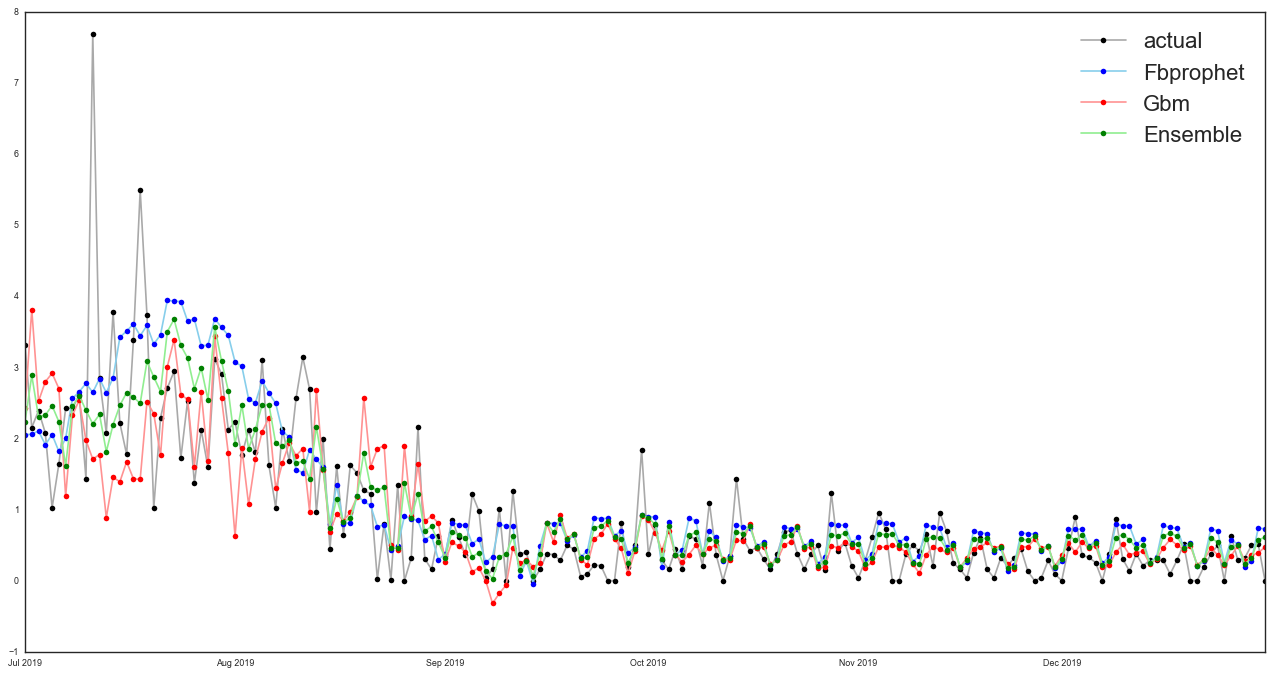

In [596]:
# 계절성 군집 뷰티 - 선스프레이

plt.style.use('seaborn-white')

fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(1,1,1)

ms=5
lw=1.5

ax.plot(y_test_beauti_2_fb_2.ds,
       y_test_beauti_2_fb_17.y,
       marker='o',
       markerfacecolor='black',
       markersize=ms,
       color='darkgray',
       linewidth=lw,
       label='actual')
ax.plot(y_pred_beauti_2_fb_2.ds,
       y_pred_beauti_2_fb_17.yhat,
       marker='o',
       markerfacecolor='blue',
       markersize=ms,
       color='skyblue',
       linewidth=lw,
       label='Fbprophet')
ax.plot(y_test_beauti_2_fb_2.ds,
       y_pred_beauti_2_ml_17.Label,
       marker='o',
       markerfacecolor='red',
       markersize=ms,
       color='#FF9292',
       linewidth=lw,
       label='Gbm')
ax.plot(y_test_beauti_2_fb_2.ds,
       y_pred_beauti_2_ensemble_17.yhat,
       marker='o',
       markerfacecolor='green',
       markersize=ms,
       color='lightgreen',
       linewidth=lw,
       label='Ensemble')

ax.legend(loc='best', fontsize=20)

# plt.savefig('./계절성군집_선스프레이_앙상블.png')
# ax.set_title()

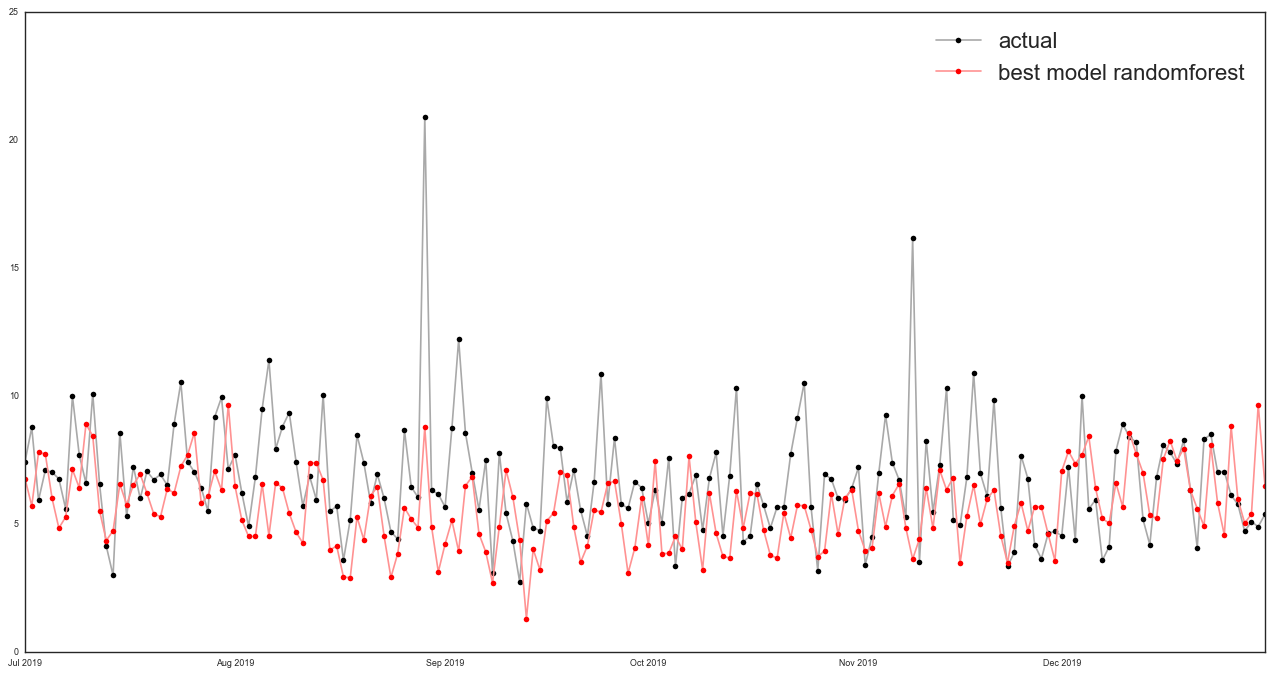

In [663]:
# 비계절성 군집 뷰티 -세안도구

plt.style.use('seaborn-white')

fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(1,1,1)

ms=5
lw=1.5

ax.plot(y_test_beauti_2_fb_2.ds,
       y_test_beauti_3_ml_21.adj_qty,
       marker='o',
       markerfacecolor='black',
       markersize=ms,
       color='darkgray',
       linewidth=lw,
       label='actual')
# ax.plot(y_pred_beauti_2_fb_2.ds,
#        y_pred_xgb_beauti_3_3.Label,
#        marker='o',
#        markerfacecolor='blue',
#        markersize=ms,
#        color='skyblue',
#        linewidth=lw,
#        label='Xgboost')
ax.plot(y_test_beauti_2_fb_2.ds,
       y_pred_ridge_beauti_3_21.Label,
       marker='o',
       markerfacecolor='red',
       markersize=ms,
       color='#FF9292',
       linewidth=lw,
       label='best model randomforest')
# ax.plot(y_test_beauti_2_fb_2.ds,
#        y_pred_ridge_beauti_3_3.Label,
#        marker='o',
#        markerfacecolor='green',
#        markersize=ms,
#        color='lightgreen',
#        linewidth=lw,
#        label='best model ridge')

ax.legend(loc='best', fontsize=20)

# plt.savefig('./비계절성군집_뷰티손거울_rf.png')

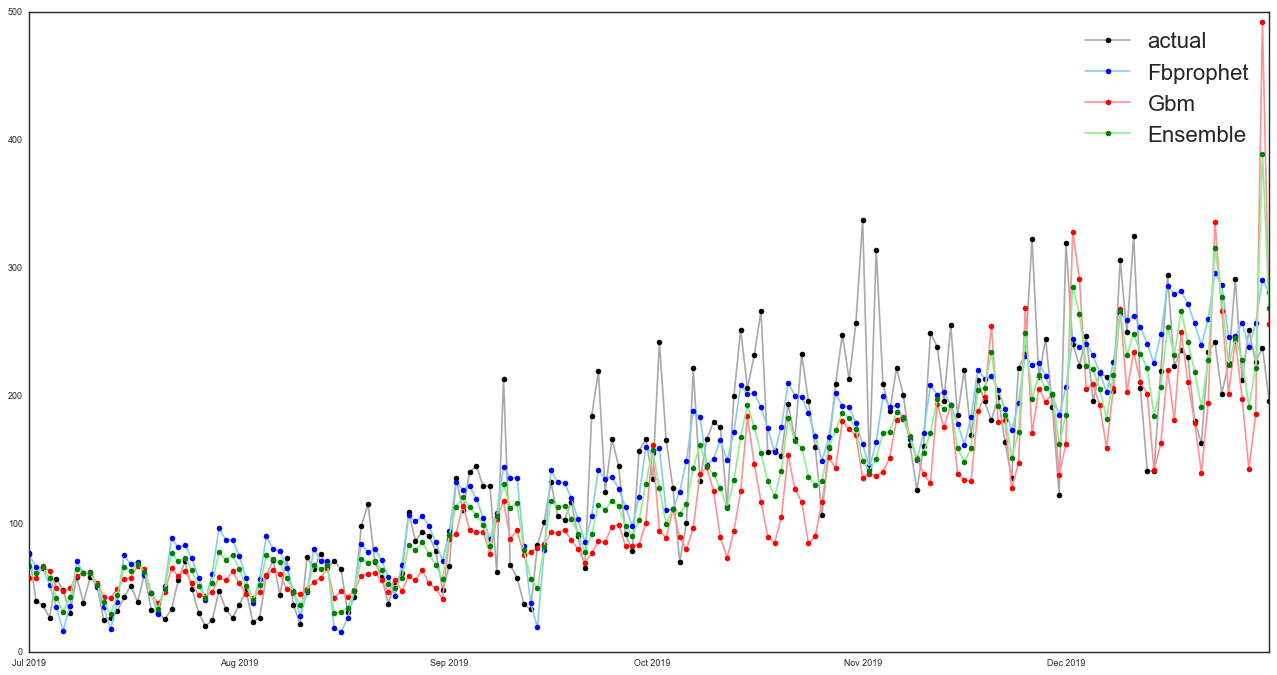

In [429]:
# 계절성 군집 식품 - 감귤/한라봉/오렌지

plt.style.use('seaborn-white')

fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(1,1,1)

ms=5
lw=1.5

ax.plot(y_test_beauti_2_fb_2.ds,
       y_test_food_1_fb_1.y,
       marker='o',
       markerfacecolor='black',
       markersize=ms,
       color='darkgray',
       linewidth=lw,
       label='actual')
ax.plot(y_pred_beauti_2_fb_2.ds,
       y_pred_food_1_fb_1.yhat,
       marker='o',
       markerfacecolor='blue',
       markersize=ms,
       color='skyblue',
       linewidth=lw,
       label='Fbprophet')
ax.plot(y_test_beauti_2_fb_2.ds,
       y_pred_food_1_ml_1.Label,
       marker='o',
       markerfacecolor='red',
       markersize=ms,
       color='#FF9292',
       linewidth=lw,
       label='Gbm')
ax.plot(y_test_beauti_2_fb_2.ds,
       y_pred_food_1_ensemble_1.yhat,
       marker='o',
       markerfacecolor='green',
       markersize=ms,
       color='lightgreen',
       linewidth=lw,
       label='Ensemble')

ax.legend(loc='best', fontsize=20)

# plt.savefig('./계절성군집_감귤_한라봉_오렌지_앙상블.png')
# ax.set_title()

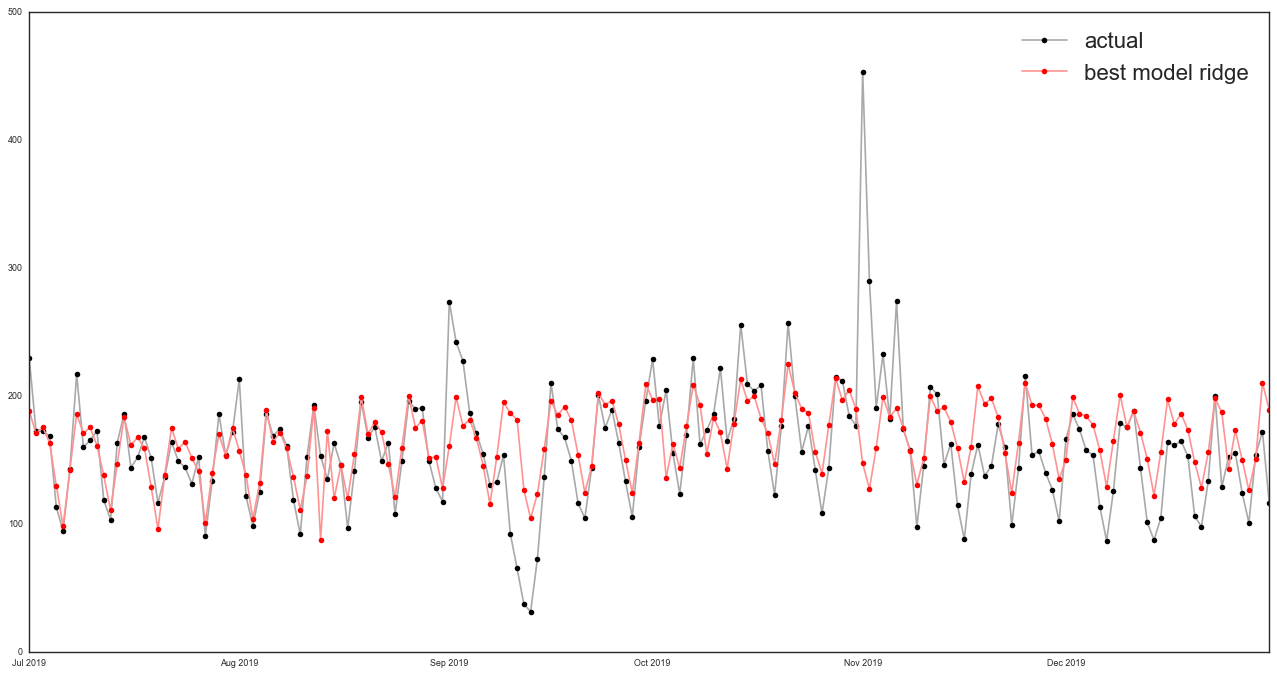

In [433]:
# 비계절성 군집 식품 -쌀
plt.style.use('seaborn-white')

fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(1,1,1)

ms=5
lw=1.5

ax.plot(y_test_beauti_2_fb_2.ds,
       y_test_food_2_ml_15.adj_qty,
       marker='o',
       markerfacecolor='black',
       markersize=ms,
       color='darkgray',
       linewidth=lw,
       label='actual')
# ax.plot(y_pred_beauti_2_fb_2.ds,
#        y_pred_xgb_food_2_15.Label,
#        marker='o',
#        markerfacecolor='blue',
#        markersize=ms,
#        color='skyblue',
#        linewidth=lw,
#        label='Xgboost')
# ax.plot(y_test_beauti_2_fb_2.ds,
#        y_pred_rf_food_2_15.Label,
#        marker='o',
#        markerfacecolor='red',
#        markersize=ms,
#        color='#FF9292',
#        linewidth=lw,
#        label='RandomForest')
ax.plot(y_test_beauti_2_fb_2.ds,
       y_pred_ridge_food_2_15.Label,
       marker='o',
       markerfacecolor='red',
       markersize=ms,
       color='#FF9292',
       linewidth=lw,
       label='best model ridge')

ax.legend(loc='best', fontsize=20)

# plt.savefig('./비계절성군집_쌀_ridge.png')

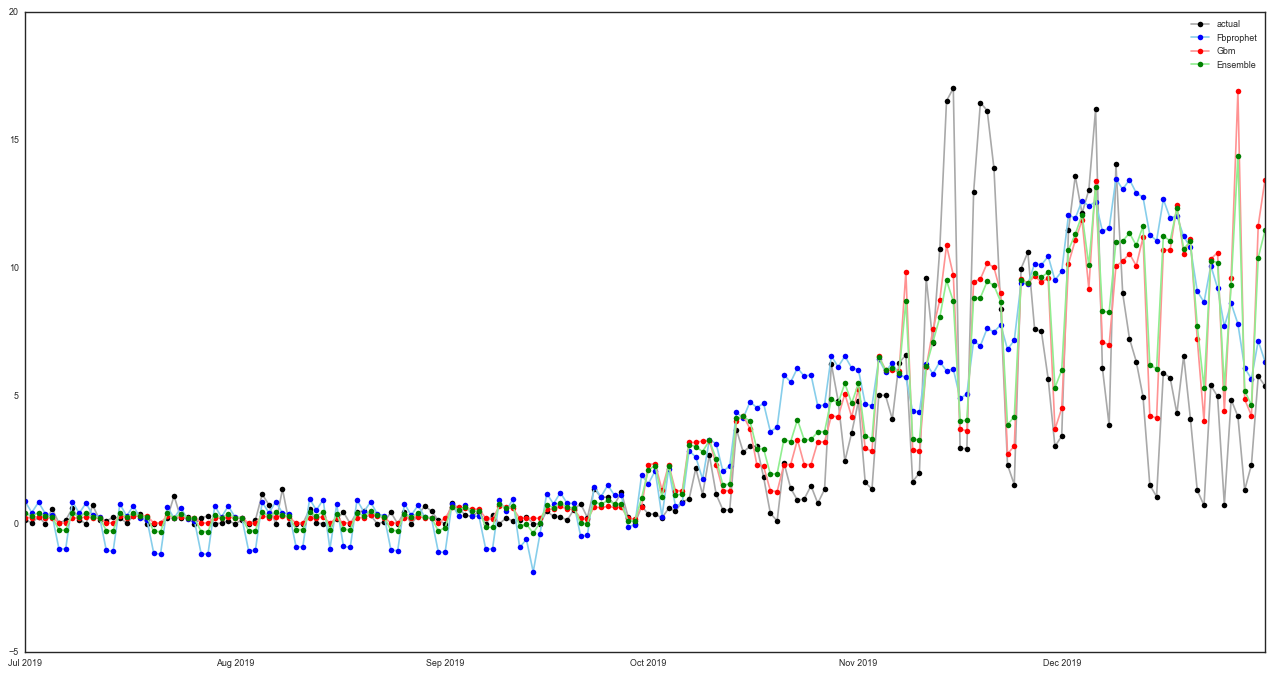

In [607]:
# 계절성 군집 냉난방가전 - 라디에이터
plt.style.use('seaborn-white')

fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(1,1,1)

ms=5
lw=1.5

ax.plot(y_test_beauti_2_fb_2.ds,
       y_test_electronic_2_fb_3.y,
       marker='o',
       markerfacecolor='black',
       markersize=ms,
       color='darkgray',
       linewidth=lw,
       label='actual')
ax.plot(y_pred_beauti_2_fb_2.ds,
       y_pred_electronic_2_fb_3.yhat,
       marker='o',
       markerfacecolor='blue',
       markersize=ms,
       color='skyblue',
       linewidth=lw,
       label='Fbprophet')
ax.plot(y_test_beauti_2_fb_2.ds,
       y_pred_electronic_2_ml_3.Label,
       marker='o',
       markerfacecolor='red',
       markersize=ms,
       color='#FF9292',
       linewidth=lw,
       label='Gbm')
ax.plot(y_test_beauti_2_fb_2.ds,
       y_pred_electronic_2_ensemble_3.yhat,
       marker='o',
       markerfacecolor='green',
       markersize=ms,
       color='lightgreen',
       linewidth=lw,
       label='Ensemble')

ax.legend(loc='best')

# plt.savefig('./냉난방가전_벽걸이에어컨_ensemble.png')
# ax.set_title()

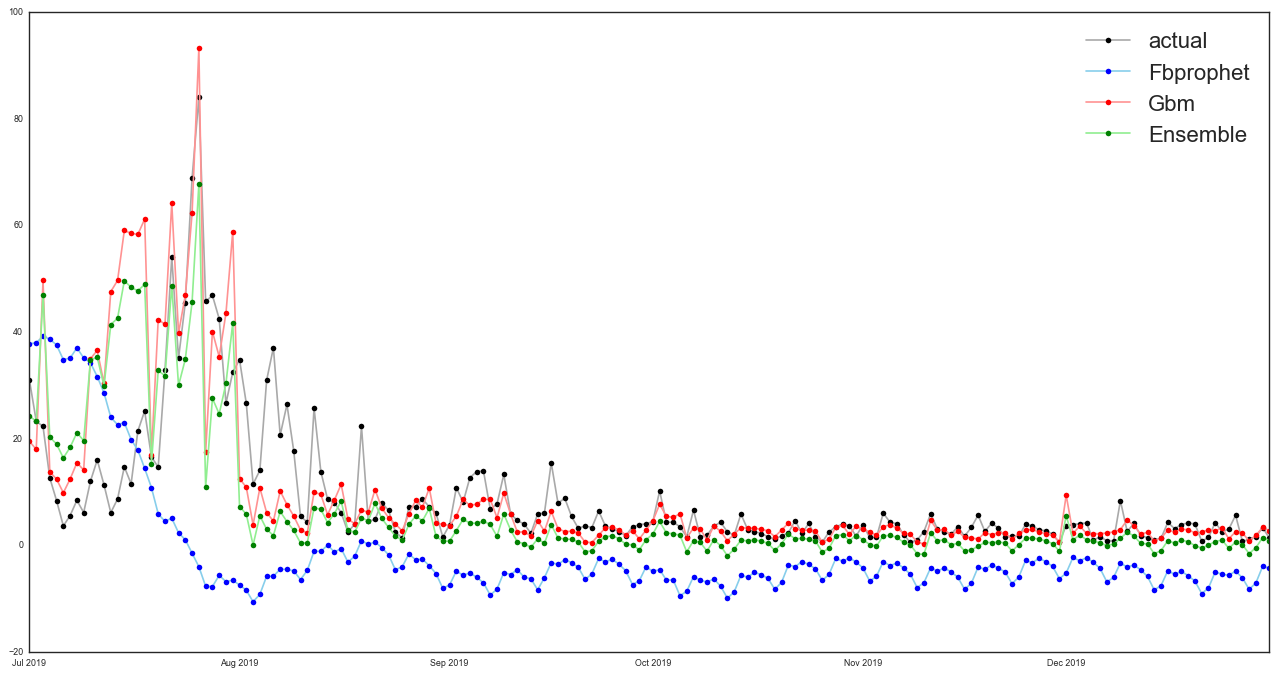

In [850]:
# 계절성 군집 

plt.style.use('seaborn-white')

fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(1,1,1)

ms=5
lw=1.5

ax.plot(y_test_beauti_2_fb_2.ds,
       y_test_electronic_1_fb_5.y,
       marker='o',
       markerfacecolor='black',
       markersize=ms,
       color='darkgray',
       linewidth=lw,
       label='actual')
ax.plot(y_pred_beauti_2_fb_2.ds,
       y_pred_electronic_1_fb_5.yhat,
       marker='o',
       markerfacecolor='blue',
       markersize=ms,
       color='skyblue',
       linewidth=lw,
       label='Fbprophet')
ax.plot(y_test_beauti_2_fb_2.ds,
       y_pred_electronic_1_ml_5.Label,
       marker='o',
       markerfacecolor='red',
       markersize=ms,
       color='#FF9292',
       linewidth=lw,
       label='Gbm')
ax.plot(y_test_beauti_2_fb_2.ds,
       y_pred_electronic_1_ensemble_5.yhat,
       marker='o',
       markerfacecolor='green',
       markersize=ms,
       color='lightgreen',
       linewidth=lw,
       label='Ensemble')

ax.legend(loc='best', fontsize=20)

# plt.savefig('./냉난방가전_제습기_앙상블.png')


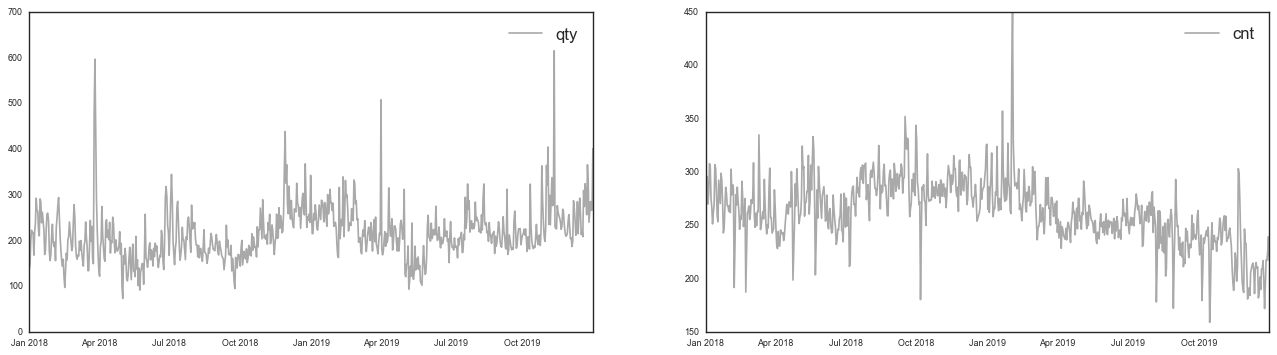

In [787]:
# 구매데이터/소셜데이터 비교
plt.style.use('seaborn-white')

fig=plt.figure(figsize=(20,5))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

ms=5
lw=1.5
i=29

ax1.plot(buy_weather_weight[buy_weather_weight.sm_cat==food_1_list[i]].reset_index().date,
       buy_weather_weight[buy_weather_weight.sm_cat==food_1_list[i]].adj_qty,
       
       markerfacecolor='black',
       markersize=ms,
       color='darkgray',
       linewidth=lw,
       label='qty')

ax2.plot(sns_df[sns_df.sm_cat==food_1_list[i]].date,
       sns_df[sns_df.sm_cat==food_1_list[i]].cnt,
      
       markerfacecolor='blue',
       markersize=ms,
       color='darkgray',
       linewidth=lw,
       label='cnt')


ax1.legend(loc='best', fontsize=15)
ax2.legend(loc='best', fontsize=15)
# ax.set_title()
# plt.savefig('./계절성군집_선스프레이_buy_sns.png')
# plt.savefig('./계절성군집_감귤_한라봉_오렌지_buy_sns.png')
# plt.savefig('./비계절성군집_쌀_buy_sns.png')
# plt.savefig('./냉난방가전_벽걸이에어컨_buy_sns.png')
# plt.savefig('./비계절성군집_뷰티손거울_buy_sns.png')
# plt.savefig('./냉난방가전_히터_buy_sns.png')

In [566]:
# scaler=MinMaxScaler()
scaler=StandardScaler()

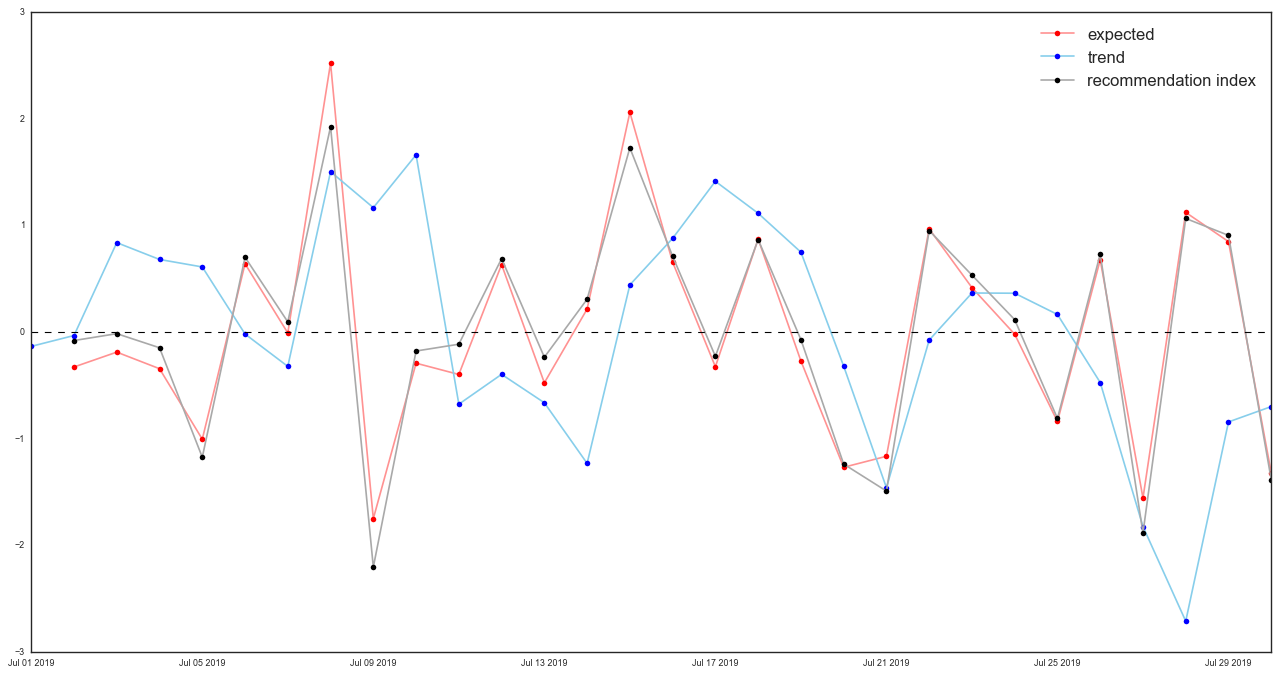

In [567]:
# 추천지수 시각화
plt.style.use('seaborn-white')

fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(1,1,1)

ms=5
lw=1.5

ax.plot(qty_sns_index_beauti_2_2.date[:30],
       scaler.fit_transform(qty_sns_index_beauti_2_2.expected[:30].values.reshape(-1, 1)),
       marker='o',
       markerfacecolor='red',
       markersize=ms,
       color='#FF9292',
       linewidth=lw,
       label='expected')
ax.plot(qty_sns_index_beauti_2_2.date[:30], 
       scaler.fit_transform(qty_sns_index_beauti_2_2.trend[:30].values.reshape(-1, 1)),
       marker='o',
       markerfacecolor='blue',
       markersize=ms,
       color='skyblue',
       linewidth=lw,
       label='trend')
ax.plot(qty_sns_index_beauti_2_2.date[:30], 
       scaler.fit_transform(qty_sns_index_beauti_2_2.qty_sns_index[:30].values.reshape(-1, 1)),
       marker='o',
       markerfacecolor='black',
       markersize=ms,
       color='darkgray',
       linewidth=lw,
       label='recommendation index')

ax.axhline(0, color='black', linestyle='--', linewidth='1')

ax.legend(loc='best',fontsize=15)

# ax.set_title()

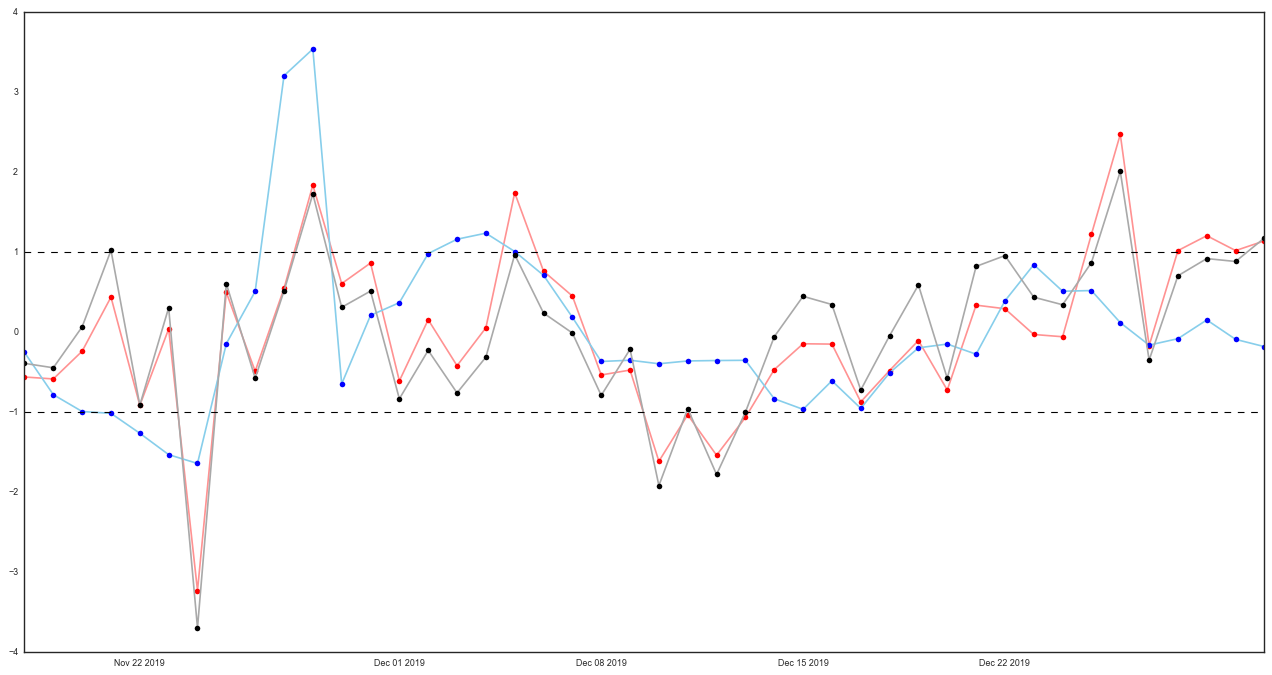

In [867]:
# 추천지수 시각화 - 베이스 메이크업용 파우더팩트 12
plt.style.use('seaborn-white')

fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(1,1,1)

ms=5
lw=1.5

ax.plot(qty_sns_index_beauti_2_2.date[140:],
       scaler.fit_transform((qty_sns_index_beauti_2_12.qty_sns_index/qty_sns_index_beauti_2_7.trend)[140:].values.reshape(-1, 1)),
       marker='o',
       markerfacecolor='red',
       markersize=ms,
       color='#FF9292',
       linewidth=lw
) # 예상판매증가율 x 판매량 보정 지수
ax.plot(qty_sns_index_beauti_2_2.date[140:], 
       scaler.fit_transform(qty_sns_index_beauti_2_12.trend[140:].values.reshape(-1, 1)),
       marker='o',
       markerfacecolor='blue',
       markersize=ms,
       color='skyblue',
       linewidth=lw
)# 트렌드 지수
ax.plot(qty_sns_index_beauti_2_2.date[140:], 
       scaler.fit_transform(qty_sns_index_beauti_2_12.qty_sns_index[140:].values.reshape(-1, 1)),
       marker='o',
       markerfacecolor='black',
       markersize=ms,
       color='darkgray',
       linewidth=lw
)# 추천지수

ax.axhline(1, color='black', linestyle='--', linewidth='1')
# ax.axhline(0, color='black', linestyle='--', linewidth='1')
ax.axhline(-1, color='black', linestyle='--', linewidth='1')

# ax.legend(loc='best',fontsize=15)

# ax.set_title()
# plt.savefig('./추천지수 시각화 - 베이스 메이크업용 파우더팩트.png')